# MDEO model: DM scan with neutrino masses

The idea is to do a firts DM random scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

#latex
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

In [2]:
import pyslha
import pyMDEO_LesHouches_generator

import neutrino_analytic
import NEUTRINO2018

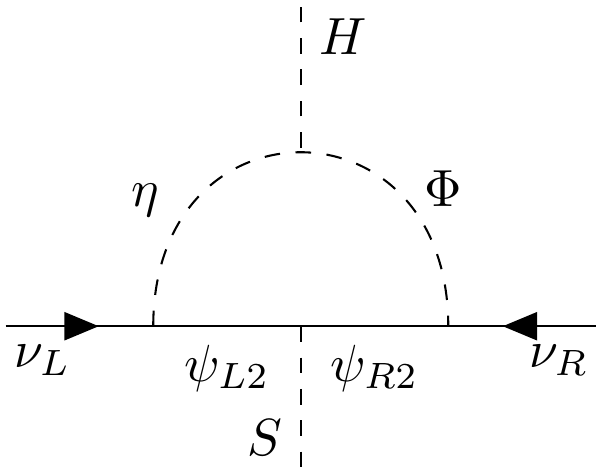

In [3]:
from IPython.display import Image
Image("/home/anferivera/Work/Documents_compartidos/MDEO/neutrino-diagram.png", width=300)

## Numerical Analysis

In [4]:
#For good plots
plt.rcParams.update({'font.size': 12}) 
#plt.rc('font',size='18')

Read full file

In [5]:
#Read full file
xd = pd.read_csv('general-scan.csv')
#File using micrOmegas 5.3.14
#xd = pd.read_csv('good-DM-values-after-running-againt5.3.14.csv')
#xd = pd.read_csv('good-DM-values-after-running-againt-603.csv')

#dmc = pd.read_csv('without-conversion-running-againt-general-scan.csv')
#Add elements
#xd['Omega1_nc'] = dmc['Omega1']
#xd['Omega2_nc'] = dmc['Omega2']

#dmc = pd.read_csv('sv-conversion-running-againt-general-scan.csv')
#Add elements
#xd['sv1122']=dmc['sv1122']
#xd['sv1100']=dmc['sv1100']
#xd['sv2211']=dmc['sv2211']
#xd['sv2200']=dmc['sv2200']

del[xd['Unnamed: 0']]

xd.shape

(9196, 86)

In [6]:
xd0=pd.read_csv('good_DM_value_fixed-low-epsilon.csv')

#Add value that David does not take
xd0['cCh2Zp'] = 1.0E-15

In [7]:
xd0.shape

(2013, 86)

In [8]:
xd0.columns

Index(['Lam1', 'Lam2', 'Lam3', 'Lam4', 'Lam5', 'Lam6', 'Lam7', 'Lam8', 'Lam9',
       'Lam10', 'Lam11', 'MS2', 'Mn2', 'vX', 'Yc', 'muC', 'g1p', 'epsilon',
       'ZL11', 'ZL12', 'ZL21', 'ZL22', 'ZR11', 'ZR12', 'ZR21', 'ZR22', 'ZN11',
       'ZN12', 'ZN21', 'ZN22', 'mXi_1', 'mXi_2', 'mns_1', 'mns_2', 'YnL11',
       'YnL12', 'YnL13', 'YnL21', 'YnL22', 'YnL23', 'YnR11', 'YnR12', 'YnR13',
       'YnR21', 'YnR22', 'YnR23', 'Omega1', 'Omega2', 'SIN1', 'SIN2', 'sv',
       'MZp', 'mh1', 'mh2', 'theta', 'thetaf', 'T', 'S', 'U', 'g2mu', 'mChi',
       'TWpSPheno', 'MZpSPheno', 'SDN1', 'SDN2', 'YX11', 'YX12', 'YX21',
       'YX22', 'cCn3N3', 'cCe3E3', 'cCu3U3', 'cCZpZp', 'cCWW', 'Xxn3N3',
       'Xxe3E3', 'Xxu3U3', 'XxZpZp', 'Xxh2Zp', 'Xxxc', 'XxWW', 'sv1122',
       'sv1100', 'sv2211', 'sv2200', 'cCh2Zp'],
      dtype='object')

In [9]:
#Reindex
xd0 = xd0.reindex(['Lam1', 'Lam2', 'Lam3', 'Lam4', 'Lam5', 'Lam6', 'Lam7', 'Lam8', 'Lam9',
       'Lam10', 'Lam11', 'MS2', 'Mn2', 'vX', 'Yc', 'muC', 'g1p', 'epsilon',
       'ZL11', 'ZL12', 'ZL21', 'ZL22', 'ZR11', 'ZR12', 'ZR21', 'ZR22', 'ZN11',
       'ZN12', 'ZN21', 'ZN22', 'mXi_1', 'mXi_2', 'mns_1', 'mns_2', 'YnL11',
       'YnL12', 'YnL13', 'YnL21', 'YnL22', 'YnL23', 'YnR11', 'YnR12', 'YnR13',
       'YnR21', 'YnR22', 'YnR23', 'Omega1', 'Omega2', 'SIN1', 'SIN2', 'sv',
       'MZp', 'mh1', 'mh2', 'theta', 'thetaf', 'T', 'S', 'U', 'g2mu', 'mChi',
       'TWpSPheno', 'MZpSPheno', 'SDN1', 'SDN2', 'YX11', 'YX12', 'YX21',
       'YX22', 'cCn3N3', 'cCe3E3', 'cCu3U3', 'cCZpZp', 'cCh2Zp', 'cCWW',
       'Xxn3N3', 'Xxe3E3', 'Xxu3U3', 'XxZpZp', 'Xxh2Zp', 'Xxxc', 'XxWW',
       'sv1122', 'sv1100', 'sv2211', 'sv2200'], axis=1)

https://docs.kanaries.net/es/topics/Pandas/pandas-reorder-columns

In [10]:
# concat DtaFrames xd and xd0
kk = pd.concat([xd,xd0],ignore_index=True )
kk = kk.reset_index()
del[kk['index']]

In [11]:
print(xd.shape,xd0.shape,kk.shape, xd.shape[0]+xd0.shape[0])

(9196, 86) (2013, 86) (11209, 86) 11209


In [12]:
xd = kk

In [13]:
xd.columns

Index(['Lam1', 'Lam2', 'Lam3', 'Lam4', 'Lam5', 'Lam6', 'Lam7', 'Lam8', 'Lam9',
       'Lam10', 'Lam11', 'MS2', 'Mn2', 'vX', 'Yc', 'muC', 'g1p', 'epsilon',
       'ZL11', 'ZL12', 'ZL21', 'ZL22', 'ZR11', 'ZR12', 'ZR21', 'ZR22', 'ZN11',
       'ZN12', 'ZN21', 'ZN22', 'mXi_1', 'mXi_2', 'mns_1', 'mns_2', 'YnL11',
       'YnL12', 'YnL13', 'YnL21', 'YnL22', 'YnL23', 'YnR11', 'YnR12', 'YnR13',
       'YnR21', 'YnR22', 'YnR23', 'Omega1', 'Omega2', 'SIN1', 'SIN2', 'sv',
       'MZp', 'mh1', 'mh2', 'theta', 'thetaf', 'T', 'S', 'U', 'g2mu', 'mChi',
       'TWpSPheno', 'MZpSPheno', 'SDN1', 'SDN2', 'YX11', 'YX12', 'YX21',
       'YX22', 'cCn3N3', 'cCe3E3', 'cCu3U3', 'cCZpZp', 'cCh2Zp', 'cCWW',
       'Xxn3N3', 'Xxe3E3', 'Xxu3U3', 'XxZpZp', 'Xxh2Zp', 'Xxxc', 'XxWW',
       'sv1122', 'sv1100', 'sv2211', 'sv2200'],
      dtype='object')

In [14]:
#xd.to_csv('general-scan.csv')

Filter with $m {\chi_1^0} < m {s_1}$ and $\lambda_5 <= \sqrt(4\pi)$

In [15]:
tp1 = xd[np.logical_and( np.abs(xd.YX11) < np.sqrt(4*np.pi), np.abs(xd.YX12) < np.sqrt(4*np.pi))]
tp2 = tp1[np.logical_and( np.abs(tp1.YX22) < np.sqrt(4*np.pi), tp1.Lam5 < np.sqrt(4*np.pi))]

xd = tp2[np.logical_and(np.abs(tp2.mXi_1) < np.abs(tp2.mns_1), 1>0 )]
#xd = xd[np.logical_and(np.abs(xd.mXi_1) < np.abs(xd.mns_1), 0<1 )]

xd = xd.reset_index()
del[xd['index']]

xd.shape

(9735, 86)

## Dark matter $\Omega h^2$

In [16]:
#Experimental values for DM:Planck results 2018
e = 10
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.108 0.12 0.132


In [17]:
xd = xd[np.logical_and((xd.Omega1+xd.Omega2)>Omega_min,(xd.Omega1+xd.Omega2)<Omega_max)]

xd = xd.reset_index()
del[xd['index']]

#Export good DM values
#del[xDM['Unnamed: 0']]
#xd.to_csv('good-DM-value.csv')

xd.shape

(9709, 86)

In [18]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

In [19]:
zkm = xd[np.logical_and(xd.epsilon<1.0e-6, 1>0)]

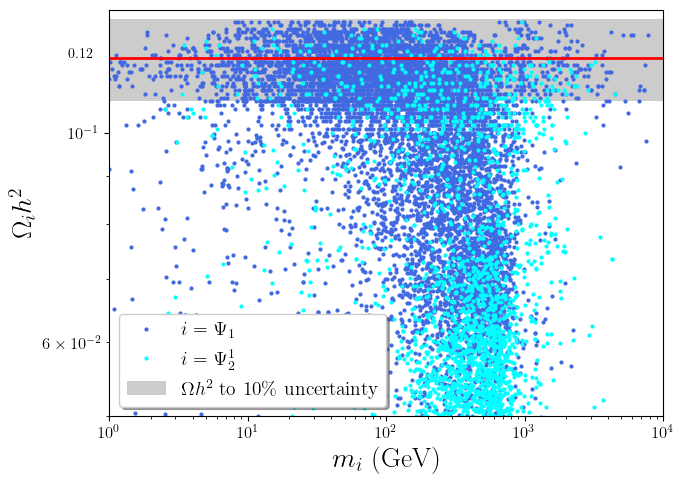

In [20]:
plt.figure(figsize=(7,5))

plt.loglog(xd.mChi,xd.Omega1,color='royalblue', marker='.',ms=4,linestyle='',label='$i=\Psi_1$')
plt.loglog(xd.mXi_1,xd.Omega2,color='cyan', marker='.',ms=4,linestyle='',label='$i=\Psi_2^1$')

#plt.loglog(zkm.mChi,zkm.Omega1,color='black', marker='.',ms=4,linestyle='',label='$i=\Psi_1$')

n=np.linspace(1e-1,1e4,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='grey',alpha=0.4,label=r'$\Omega h^2$ to $10\%$ uncertainty')

#plt.hlines(Omega_max,0.1,1e4, color='cyan',label=r'')
#plt.hlines(Omega_min,0.1,1e4, color='cyan',label=r'')
plt.hlines(Omega,0.1,1e4, 'r',lw=2,label=r'')
plt.text(0.5,0.12,r'0.12',color='black', fontsize=10)

plt.xlabel(r'$m_i$ (GeV)',size=20)
plt.ylabel(r'$\Omega_i h^2$',size=20)
plt.legend(prop={'size':14},shadow=True,loc='lower left')

#plt.ylim(Omega_min,Omega_max)
plt.ylim(5e-2,Omega_max+0.003)
plt.xlim(1, 1e4)
plt.tight_layout()

plt.savefig('plots/DM.pdf')
#plt.show()

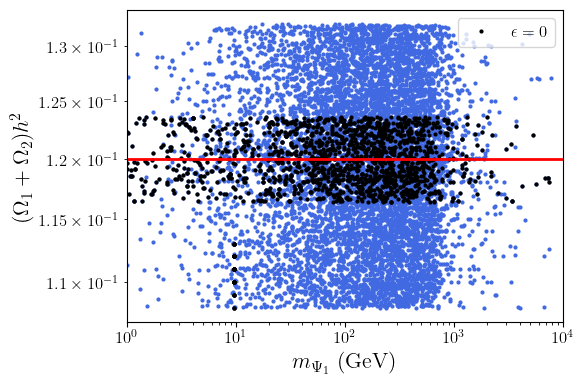

In [21]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mChi,(xd.Omega1+xd.Omega2),color='royalblue', marker='o',ms=2,linestyle='',label='')
plt.loglog(zkm.mChi,(zkm.Omega1+zkm.Omega2),color='black', marker='o',ms=2,linestyle='',label=r'$\epsilon=0$')

#plt.hlines(Omega_max,0.1,1e4, color='cyan',label=r'')
#plt.hlines(Omega_min,0.1,1e4, color='cyan',label=r'')
plt.hlines(Omega,0.1,1e4, 'r',lw=2,label=r'')
#plt.text(0.5,0.12,r'0.12',color='black', fontsize=12)

plt.xlabel(r'$m_{\Psi_1}$ (GeV)',size=16)
plt.ylabel(r'$(\Omega_1 + \Omega_2) h^2$',size=16)
plt.legend()

#plt.ylim(Omega - 3*0.0012,Omega + 3*0.0012)
#plt.ylim(5e-3,Omega_max)
plt.xlim(1, 1e4)

plt.tight_layout()
plt.show()

In [22]:
#FeynCalc: 4 version with 3/2
def a_coefficient_Fey(g1p, MZp, Mx):
    r = MZp/Mx
    k = g1p**4*(1.-r**2)**(3/2)*(1519*r**2+162)/(16.*np.pi*Mx**2*r**2*(r**2-2.)**2)  
    return k

def b_coefficient_Fey(g1p, MZp, Mx,Ms): 
    
    r = MZp/Mx
    c0 = -21261*Ms**4/4 -9318*Ms**2*Mx**2 +476610*Mx**4
    cm4 = (13122*Ms**4-209952*Ms**2*Mx**2+944784*Mx**4)/r**4 
    cm2 = (-162*Ms**4+106272*Ms**2*Mx**2-894888*Mx**4)/r**2
    c2 = (6724*Ms**4-60434*Ms**2*Mx**2+35737*Mx**4)*r**2
    
    n = g1p**4*(cm4+cm2+c0+c2 )
    
    d = 384.*np.pi*(Ms**2*Mx-4.*Mx**3)**2
    k = n/d 
    return k

In [23]:
xd.shape[0]

9709

In [24]:
xd.MZp[10]

381.22330873474544

In [25]:
#Return a Panda: DataFrame

y=[]

for i in range(0,xd.shape[0]):

    a = a_coefficient_Fey(g1p=xd.g1p[i], MZp=xd.MZp[i], Mx=xd.mChi[i])
    b = b_coefficient_Fey(g1p=xd.g1p[i], MZp=xd.MZp[i], Mx=xd.mChi[i], Ms=xd.mh2[i])

    y.append([a,b])

y=np.asarray(y)   

yd=pd.DataFrame(y,columns=['a','b'])    

/tmp/ipykernel_262726/677933375.py:4: RuntimeWarning: invalid value encountered in scalar power
  k = g1p**4*(1.-r**2)**(3/2)*(1519*r**2+162)/(16.*np.pi*Mx**2*r**2*(r**2-2.)**2)


In [26]:
yd[:3]

a             b
0  1.029681e-14  2.122087e-09
1  3.073237e-14  8.661100e-10
2  4.070029e-17  1.891348e-12

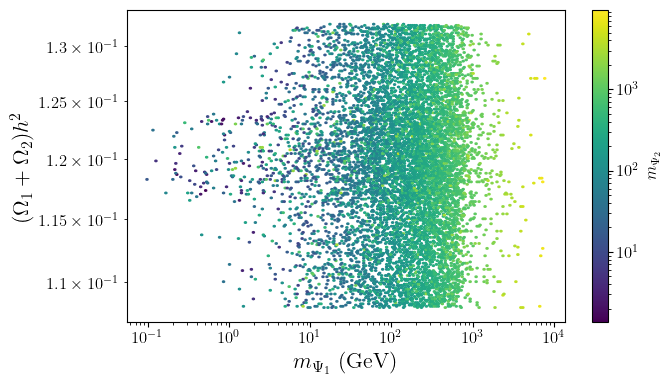

In [28]:
plt.figure(figsize=(7,4))

plt.hexbin( xd.mChi, (xd.Omega1+xd.Omega2), xd.mXi_1, xscale='log',yscale='log',bins='log', gridsize = 200)
a=plt.colorbar()
a.set_label(r'$m_{\Psi_2}$',size=12)

#plt.hlines(Omega_max,0.01,1e3, 'g',label=r'')
#plt.hlines(Omega_min,0.01,1e3, 'g',label=r'')
#plt.hlines(Omega,0.01,1e4, 'r',label=r'$\Omega h^2=$0.12')

plt.xlabel(r'$m_{\Psi_1}$ (GeV)',size=16)
plt.ylabel(r'$(\Omega_1 + \Omega_2) h^2$',size=16)
#plt.legend()

#plt.ylim(Omega_min-0.002,Omega_max+0.002)
#plt.ylim(1e-2,Omega_max)
#plt.xlim(1, 1e4)

plt.tight_layout()

DM conversion

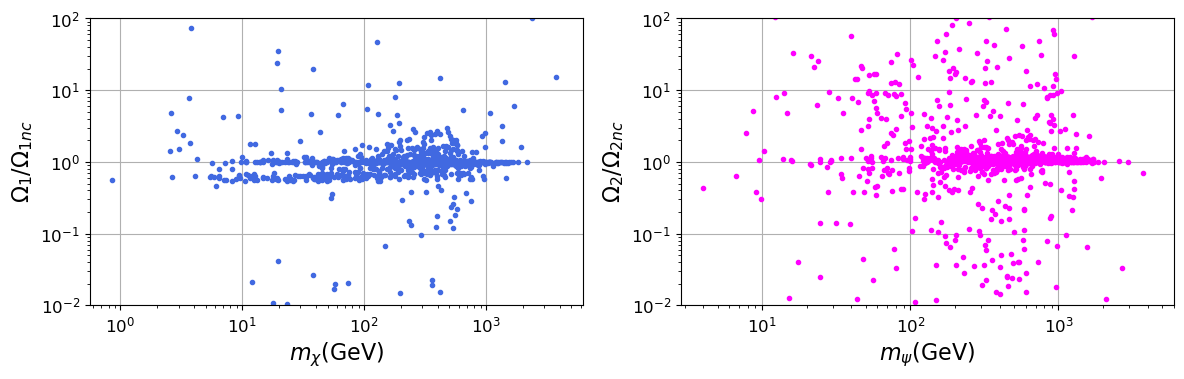

In [17]:
'''plt.figure(figsize=(12,7))

plt.subplot(221)
plt.loglog(xd.mChi,xd.Omega1_nc/xd.Omega1,color='royalblue', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_\chi$(GeV)',size=16)
plt.ylabel(r'$\Omega_1/\Omega_{1nc}$',size=16)
#plt.legend()

#plt.ylim(Omega_min-0.002,Omega_max+0.002)
plt.ylim(1e-2,1e2)
#plt.xlim(1e-4, 0.13)
plt.grid()

plt.tight_layout()

plt.subplot(222)
plt.loglog(xd.mXi_1,xd.Omega2_nc/xd.Omega2,color='magenta', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_\psi$(GeV)',size=16)
plt.ylabel(r'$\Omega_2/\Omega_{2nc}$',size=16)
#plt.legend()

#plt.ylim(Omega_min-0.002,Omega_max+0.002)
plt.ylim(1e-2,1e2)
#plt.xlim(1e-4, 0.13)
plt.grid()

plt.tight_layout()'''

## Neutrino masess

In [29]:
mnus = neutrino_analytic.MatrixDiag_new(xd.ZL11,xd.ZL12,xd.ZL21,xd.ZL22,xd.ZR11,xd.ZR12,xd.ZR21,xd.ZR22,xd.ZN11,\
                                    xd.ZN12,xd.ZN21,xd.ZN22,xd.YnL11,xd.YnL12,xd.YnL13,xd.YnL21,xd.YnL22,\
                                    xd.YnL23,xd.YnR11,xd.YnR12,xd.YnR13,xd.YnR21,xd.YnR22,xd.YnR23,\
                                    xd.mXi_1,xd.mXi_2,xd.mns_1,xd.mns_2)

mnus = np.asarray(mnus)

xd['mn1'] = mnus[0]
xd['mn2'] = mnus[1]
xd['mn3'] = mnus[2]

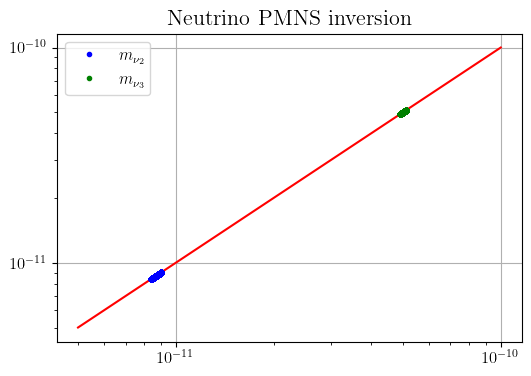

In [30]:
plt.figure(figsize=(6,4))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mn2,xd.mn2,'b.',label=r'$m_{\nu_2}$')
plt.loglog(xd.mn3,xd.mn3,'g.',label=r'$m_{\nu_3}$')

plt.title(r'Neutrino PMNS inversion',size=16)
plt.legend()

plt.grid()
#plt.savefig('plots/neutrino_masses.pdf')
plt.show()

# Direct and indirec detection

In [31]:
from indirectdirect import *

In [32]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENONnTSI']
xe = np.loadtxt('fits/fit_XENONnT/fig4-230314729-SI.dat')
xdxe = pd.DataFrame(xe, columns=names1)

XENONnT=interpolate.interp1d(xdxe.MDM,xdxe.XENONnTSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('fits/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('fits/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('fits/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

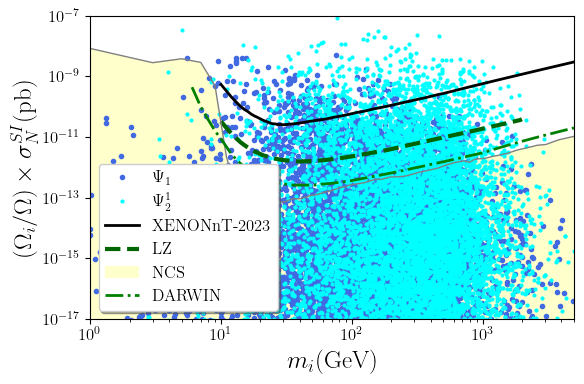

In [33]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mChi, (xd.Omega1/Omega)*xd.SIN1, color='royalblue', marker='o',ms=3,linestyle='', label=r'$\Psi_1$')
plt.loglog(xd.mXi_1, (xd.Omega2/Omega)*xd.SIN2, color='cyan', marker='o',ms=2,linestyle='', label=r'$\Psi_2^1$')

#XENON1T
n=np.arange(10,5000)
plt.loglog(n,XENONnT(n)*1e+36,'k-',lw=2,label='XENONnT-2023')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.2,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='green',linestyle='-.',lw=2,label='DARWIN')

plt.xlabel(r'$m_i$(GeV)',size=18)
plt.ylabel(r'$(\Omega_i/\Omega)\times\sigma_N^{SI}$(pb)',size=18)
plt.legend(prop={'size':12},shadow=True,loc='lower left')
plt.xlim(1e0,5e3)
plt.ylim(1e-17,1e-7)
#plt.ylim(1e-11,3.5e-9)
#plt.grid()

plt.tight_layout()
plt.show()

cut in the SI cross-section under XENONnT

In [34]:
print(xd.mChi.max(),xd.mXi_1.max())

7749.024133494819 9468.357018577237


In [35]:
#return 1 when there is a point not exclude by DD
def CutXe(m,Omega,SI):

    if m < 8. or m > 5000.:
        k = 1
    else:
        if (XENONnT(m)*1e+36 - (Omega/0.12)*SI) >0:
            k=1
        else:
            k=0
            
    return k        

#run all dataframe
CutXe_new=np.vectorize(CutXe,doc='Input for pyfunc below:m,Omega,SI')

In [36]:
xd['kSI1'] = CutXe_new(xd.mChi, xd.Omega1,xd.SIN1)
xd['kSI2'] = CutXe_new(xd.mXi_1, xd.Omega2,xd.SIN2)

Only good ponits in SI

In [37]:
xd = xd[np.logical_and(xd.kSI1 ==1,xd.kSI2 ==1)]

xd = xd.reset_index()
del[xd['index']]

xd.shape

(9278, 91)

cut above the DARWIN future detector

In [38]:
print(DARSI(5.1),DARSI(5000))

2.206552882032262e-45 2.0100962336504978e-47


In [39]:
#return 1 when there is a point above DARWIN limit
def CutDarwin(m,Omega,SI):

    if m < 5.1 or m > 5000.:
        k = 1
    else:
        if (DARSI(m)*1e+36 - (Omega/0.12)*SI) < 0:
            k=1
        else:
            k=0
            
    return k        

#run all dataframe
CutDarwin_new=np.vectorize(CutDarwin,doc='Input for pyfunc below:m,Omega,SI')

In [40]:
xd['aboveDarwinSI1'] = CutDarwin_new(xd.mChi, xd.Omega1,xd.SIN1)
xd['aboveDarwinSI2'] = CutDarwin_new(xd.mXi_1, xd.Omega2,xd.SIN2)

## $\Delta$ N effetive

$N_{eff}=2.99\pm 0.17$
$N_{s}=3.046$

https://arxiv.org/pdf/1807.06209.pdf

PLack + BAO $\to \Delta N_{eff}\approx 0.3$
https://arxiv.org/pdf/1909.09574.pdf

In [41]:
from delta_N_efective import *

In [42]:
xd['DNeff'] = ΔNeff1_vec(2.3e-3, xd.epsilon, xd.TWpSPheno, xd.g1p)
#xd['DNeff'] = ΔNeff1_vec(2.3e-3, 0, xd.TWpSPheno, xd.g1p)

In [43]:
xdNeff = xd[xd.DNeff < 0.3 ]

In [44]:
print(xd.shape[0],xdNeff.shape[0])

9278 4687


In [45]:
xdNeff.epsilon.max()

3.172036956283578e-05

## DM Conversion: annihilation and conversion

\begin{align}
\xi_{ann}^1 = \dfrac{\sigma v_{1100}}{\sigma v_{1100}+\sigma v_{1122}}
\end{align}

\begin{align}
\xi_{cov}^1 = \dfrac{\sigma v_{1122}}{\sigma v_{1100}+\sigma v_{1122}}
\end{align}

In [46]:
xd['svanni']=xd.sv1100/(xd.sv1100+xd.sv1122)
xd['svconv']=xd.sv1122/(xd.sv1100+xd.sv1122)
xd['svanni2']=xd.sv2200/(xd.sv2200+xd.sv2211)
xd['svconv2']=xd.sv2211/(xd.sv2200+xd.sv2211)

### Anality: Vector SI cross-section

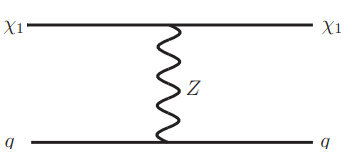

In [47]:
from IPython.display import Image
Image("vector-SI.png", width=250)

In [48]:
#Parameters
fN = 0.25
v = 246
vev = 246
#nucleon mass in GeV (proton and neutron mass)
MNp = 938.27*1.e-3
MNn = 939.56*1.e-3 
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1.e+13)**(-2)*1.e+36

# XENON-129 and XENON-131
Z = 54
#A = 129
A = 131.293
#SARAH
GF = 1.166370e-05
MW = 79.6565734
MZ = 91.1887000

Theta_W = np.arccos(MW/MZ)
alpha   = 1./137.035999
ce      = np.sqrt(4.*np.pi*alpha)
g       = ce/np.sin(Theta_W)
gp      = ce/np.cos(Theta_W)

\begin{align}
\sigma^{SI}_{\chi N}= \dfrac{1}{4\pi}\dfrac{M_N^2m_{\chi^0}^2}{(M_N+m_{\chi^0})^2}\dfrac{g_{eff}^4}{M_{Z'}^4}B^2
\end{align}

https://arxiv.org/pdf/1409.8165.pdf

In [49]:
xd['mrChi'] = MNn*xd.mChi/(MNn+xd.mChi)
xd['mrXi_1'] = MNn*xd.mXi_1/(MNn+xd.mXi_1)

xd['SIZp_Chi'] = (1./(4*np.pi))*xd.mrChi**2*((xd.g1p*np.cos(xd.TWpSPheno)*(gp*np.sin(Theta_W)*np.sin(xd.TWpSPheno)-xd.epsilon*gp*np.cos(xd.TWpSPheno)))**2/xd.MZp**4)*(-4+5)**2*GeVtomin2topb
xd['SIZp_Xi'] = (1./(4*np.pi))*xd.mrXi_1**2*((xd.g1p*np.cos(xd.TWpSPheno)*(gp*np.sin(Theta_W)*np.sin(xd.TWpSPheno)-xd.epsilon*gp*np.cos(xd.TWpSPheno)))**2/xd.MZp**4)*(10+1)**2*GeVtomin2topb

xd['SIZ_Chi'] = (1./(4*np.pi))*xd.mrChi**2*((xd.g1p*np.sin(xd.TWpSPheno)*(gp*np.sin(Theta_W)*np.cos(xd.TWpSPheno)+xd.epsilon*gp*np.sin(xd.TWpSPheno)))**2/MZ**4)*(-4+5)**2*GeVtomin2topb
xd['SIZ_Xi'] = (1./(4*np.pi))*xd.mrXi_1**2*((xd.g1p*np.sin(xd.TWpSPheno)*(gp*np.sin(Theta_W)*np.cos(xd.TWpSPheno)+xd.epsilon*gp*np.sin(xd.TWpSPheno)))**2/MZ**4)*(10+1)**2*GeVtomin2topb


In [50]:
xdNeff.epsilon.max()

3.172036956283578e-05

In [51]:
from pareto import *

$\Delta N_{eff}$ cut

In [52]:
#DeltaNeef < 0.3 frontier
XNeff1,YNeff1 = pareto_frontier(xdNeff['mChi'].values,((xdNeff.Omega1/Omega)*xdNeff.SIN1).values,False,True)
XNeff12,YNeff12 = pareto_frontier(xdNeff['mChi'].values,((xdNeff.Omega1/Omega)*xdNeff.SIN1).values,True,True)

XNeff2,YNeff2 = pareto_frontier(xdNeff['mXi_1'].values,((xdNeff.Omega2/Omega)*xdNeff.SIN2).values,False,True)
XNeff22,YNeff22 = pareto_frontier(xdNeff['mXi_1'].values,((xdNeff.Omega2/Omega)*xdNeff.SIN2).values,True,True)

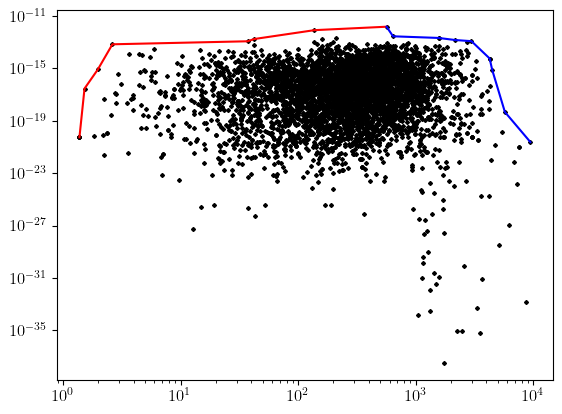

In [53]:
plt.loglog(xdNeff.mXi_1, (xdNeff.Omega2/Omega)*xdNeff.SIN2, color='black', marker='D',ms=2,linestyle='', label=r'')

plt.plot(XNeff2,YNeff2,'r-')
plt.plot(XNeff22,YNeff22,'b-')

kinetic mixing cut

In [54]:
#Cur in the kinetic mixing
xdm6 = xd[xd.epsilon <1.0e-6]
xdm7 = xd[xd.epsilon <1.0e-7]
xdm8 = xd[xd.epsilon <1.0e-8]
xdm9 = xd[xd.epsilon <1.0e-9]
xdm10 = xd[xd.epsilon <1.0e-10]
xdm11 = xd[xd.epsilon <1.0e-11]

In [55]:
#epsilon < 1e-6 frontier
Xdm61,Ydm61 = pareto_frontier(xdm6['mChi'].values,((xdm6.Omega1/Omega)*xdm6.SIN1).values,False,True)
Xdm612,Ydm612 = pareto_frontier(xdm6['mChi'].values,((xdm6.Omega1/Omega)*xdm6.SIN1).values,True,True)

Xdm62,Ydm62 = pareto_frontier(xdm6['mXi_1'].values,((xdm6.Omega2/Omega)*xdm6.SIN2).values,False,True)
Xdm622,Ydm622 = pareto_frontier(xdm6['mXi_1'].values,((xdm6.Omega2/Omega)*xdm6.SIN2).values,True,True)

(1e-24, 6e-09)

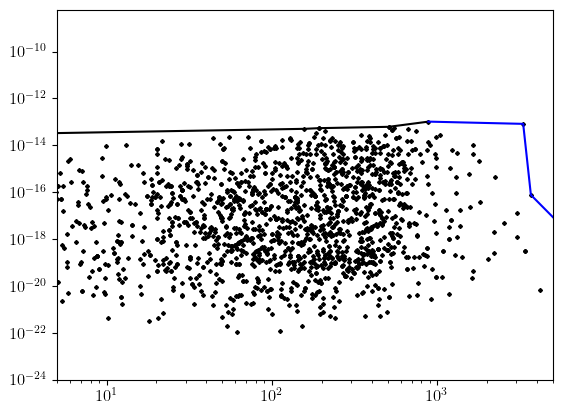

In [56]:
plt.loglog(xdm6.mChi, (xdm6.Omega1/Omega)*xdm6.SIN1, color='black', marker='D',ms=2,linestyle='', label=r'')

plt.plot(Xdm61,Ydm61,'k-')
plt.plot(Xdm612,Ydm612,'b-')

plt.xlim(5e0,5e3)
plt.ylim(1e-24,6e-9)

In [57]:
cSI1 = pd.read_csv('contourSI1.csv')
del[cSI1['Unnamed: 0']]
cSI1 = cSI1.sort_values('x')

cSI2 = pd.read_csv('contourSI2.csv')
del[cSI2['Unnamed: 0']]
cSI2 = cSI2.sort_values('x')

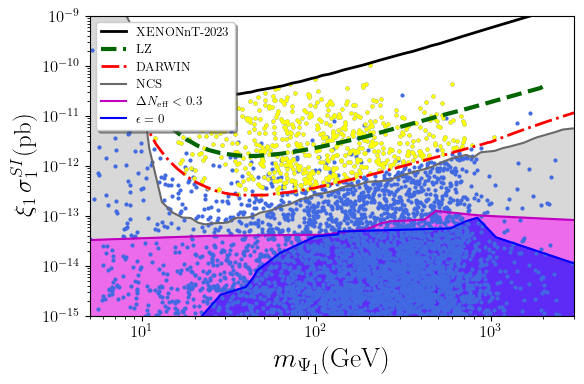

In [58]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mChi, (xd.Omega1/Omega)*xd.SIN1, color='royalblue', marker='o',ms=2,linestyle='', label=r'')
#Above Darwin
plt.loglog(xd.mChi, (xd.Omega1/Omega)*xd.SIN1*xd.aboveDarwinSI1*xd.aboveDarwinSI2, color='yellow',\
           marker='o',ms=2,linestyle='', label=r'')

#XENON1T
n=np.arange(10,5000)
plt.loglog(n,XENONnT(n)*1e+36,'k-',lw=2,label='XENONnT-2023')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='red',linestyle='-.',lw=2,label='DARWIN')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='dimgray',lw=1.5,label='NCS')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='grey',alpha=0.3,label='')

######### Neff ############
#plt.loglog(xdNeff.mChi, (xdNeff.Omega1/Omega)*xdNeff.SIN1, color='black', marker='D',ms=2,linestyle='', label=r'')
plt.plot(XNeff1,YNeff1,'m-',label=r'$\Delta N_{\mathrm{eff}}<0.3$')
plt.plot(XNeff12,YNeff12,'m-')
plt.fill_between(XNeff1, 1e-16, YNeff1, color='magenta', alpha=0.5)
plt.fill_between(XNeff12, 1e-16, YNeff12, color='magenta', alpha=0.5)

#plt.plot(Xdm61,Ydm61,'r-',label=r'$\epsilon <10^{-6}$')
#plt.plot(Xdm612,Ydm612,'r-')

plt.plot(cSI1['x'],cSI1['y'],'b-',label=r'$\epsilon =0$')
plt.fill_between(cSI1['x'], 1e-16, cSI1['y'], color='blue', alpha=0.6)

#plt.text(7,2e-15, '$\Delta N_{\mathbf{eff}}<0.3$', fontsize = 14)
#plt.text(10e2,2e-15, '$\epsilon=0$',color='black', fontsize = 16)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=20)
plt.ylabel(r'$\xi_1\,\sigma_1^{SI}$(pb)',size=18)
plt.legend(prop={'size':9},shadow=True,loc='best')
plt.xlim(5e0,3e3)
plt.ylim(1e-15,1e-9)

plt.tight_layout()
plt.savefig('plots/SI1.pdf')
#plt.show()

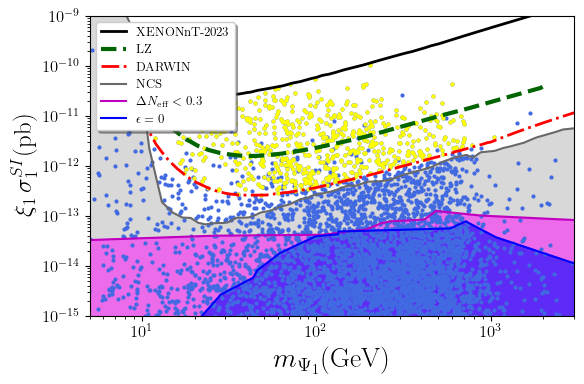

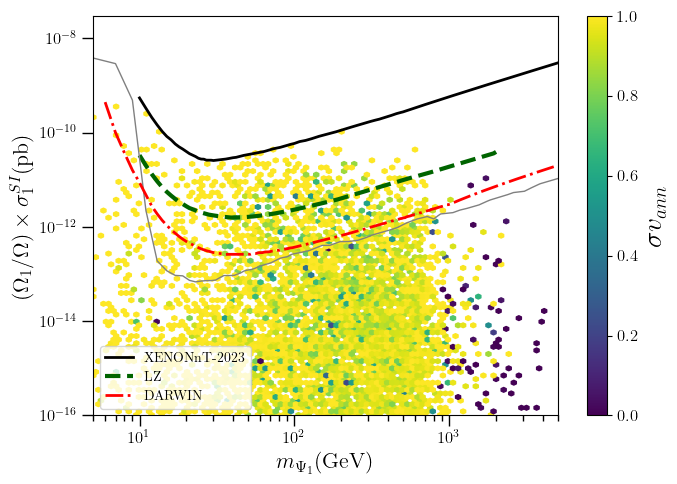

In [56]:
plt.figure(figsize=(7,5))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, ((xd.Omega1+1e-10)/Omega)*(xd.SIN1+1e-20),xd.svanni,xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\sigma v_{ann}$',size=20)

#XENON1T
n=np.arange(10,5000)
plt.loglog(n,XENONnT(n)*1e+36,'k-',lw=2,label='XENONnT-2023')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='red',linestyle='-.',lw=2,label='DARWIN')

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$(\Omega_1/\Omega)\times\sigma_1^{SI}$(pb)',size=16)
plt.legend(prop={'size':10},loc='lower left')
plt.xlim(5e0,5e3)
plt.ylim(1e-16,3e-8)

plt.tight_layout()
plt.show()

Benchmark point

In [59]:
BP = xd[np.logical_and(xd.mChi >100, xd.mChi <100.25)]
BP

Lam1      Lam2      Lam3      Lam4      Lam5      Lam6      Lam7  \
1498  0.258146  0.898082  0.000108  0.053357  0.267282  0.000003  0.000196   
2860  0.258148  0.140903  0.009151  0.000133  0.302510  0.000783  0.001549   

          Lam8      Lam9     Lam10  ...  svanni         svconv   svanni2  \
1498  0.000245  0.004968  0.149098  ...     1.0   8.704554e-24  0.878227   
2860  0.027625  0.035937  0.035249  ...     1.0  7.928091e-244  0.995426   

       svconv2     mrChi    mrXi_1      SIZp_Chi       SIZp_Xi       SIZ_Chi  \
1498  0.121773  0.930832  0.935435  1.187095e-12  1.450624e-10  1.334094e-18   
2860  0.004574  0.930819  0.938836  2.294944e-14  2.824922e-12  2.114429e-15   

            SIZ_Xi  
1498  1.630256e-16  
2860  2.602720e-13  

[2 rows x 104 columns]

In [63]:
#BP.to_csv('BP.csv')
#BP.to_excel('BP.xlsx')

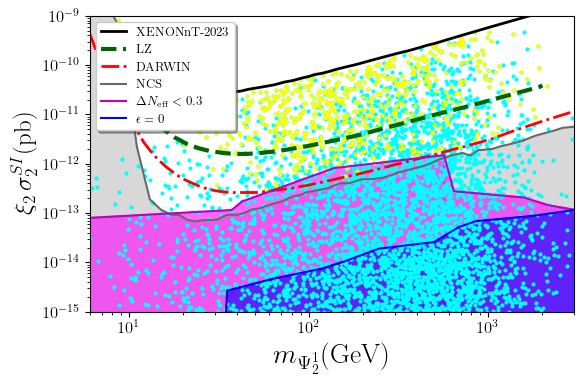

In [60]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mXi_1, (xd.Omega2/Omega)*xd.SIN2, color='cyan', marker='o',ms=2,linestyle='', label=r'')
#Above Darwin
plt.loglog(xd.mXi_1, (xd.Omega2/Omega)*xd.SIN2*xd.aboveDarwinSI1*xd.aboveDarwinSI2, color='yellow', marker='o',ms=2,linestyle='', label=r'')


#plt.loglog(xd.mXi_1, xd.SIN2, color='red', marker='.',ms=4,linestyle='', label=r'$\chi^0_1$')

#plt.loglog(xd.mXi_1, (xd.Omega2/Omega)*(xd.SIZp_Xi+xd.SIZ_Xi), color='black', marker='.',ms=4,linestyle='', label=r'vector portal')

#XENON1T
n=np.arange(10,5000)
plt.loglog(n,XENONnT(n)*1e+36,'k-',lw=2,label='XENONnT-2023')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='red',linestyle='-.',lw=2,label='DARWIN')


#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='dimgray',lw=1.5,label='NCS')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='grey',alpha=0.3,label='')

######### Neff ############
#plt.loglog(xdNeff.mXi_1, (xdNeff.Omega2/Omega)*xdNeff.SIN2, color='black', marker='D',ms=2,linestyle='', label=r'')
plt.plot(XNeff2,YNeff2,'m-',label=r'$\Delta N_{\mathrm{eff}}<0.3$')
plt.plot(XNeff22,YNeff22,'m-')
plt.fill_between(XNeff2, 1e-16, YNeff2, color='magenta', alpha=0.6)
plt.fill_between(XNeff22, 1e-16, YNeff22, color='magenta', alpha=0.6)

#plt.plot(Xdm62,Ydm62,'r-',label=r'$\epsilon <10^{-6}$')
#plt.plot(Xdm622,Ydm622,'r-')

plt.plot(cSI2['x'],cSI2['y'],'b-',label=r'$\epsilon =0$')
plt.fill_between(cSI2['x'], 1e-16, cSI2['y'], color='blue', alpha=0.6)

#plt.text(7,2e-15, '$\Delta N_{\mathbf{eff}}<0.3$', fontsize = 14)
#plt.text(3.0e2,2e-15, '$\epsilon=0$',color='black', fontsize = 16)

plt.xlabel(r'$m_{\Psi_2^1}$(GeV)',size=20)
plt.ylabel(r'$\xi_2\,\sigma_2^{SI}$(pb)',size=18)
plt.legend(prop={'size':9},shadow=True,loc='best')
plt.xlim(6e0,3e3)
plt.ylim(1e-15,1e-9)

plt.tight_layout()
plt.savefig('plots/SI2.pdf') #old plot
#plt.show()

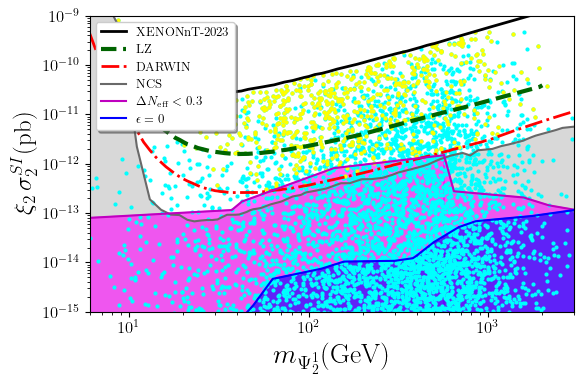

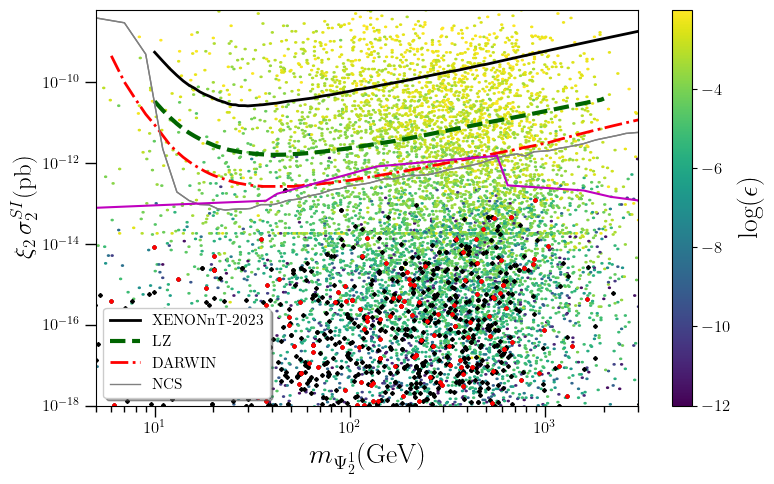

In [61]:
plt.figure(figsize=(8,5))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mXi_1, (xd.SIN2+1e-20), np.log10(xd.epsilon + 1.0e-12),\
           xscale='log',yscale='log',gridsize = 400)
a=plt.colorbar()
a.set_label(r'$\log(\epsilon)$',size=20)

plt.loglog(xdm6.mChi, (xdm6.Omega2/Omega)*xdm6.SIN2, color='black', marker='D',ms=2,linestyle='', label=r'')

plt.loglog(xdm11.mChi, (xdm11.Omega2/Omega)*xdm11.SIN2, color='red', marker='D',ms=2,linestyle='', label=r'')

#XENON1T
n=np.arange(10,5000)
plt.loglog(n,XENONnT(n)*1e+36,'k-',lw=2,label='XENONnT-2023')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='red',linestyle='-.',lw=2,label='DARWIN')


#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='NCS')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
#plt.fill_between(n,1.e-38,back,facecolor='grey',alpha=0.1,label='NCS')

plt.plot(XNeff2,YNeff2,'m-')
plt.plot(XNeff22,YNeff22,'m-')

plt.xlabel(r'$m_{\Psi_2^1}$(GeV)',size=20)
plt.ylabel(r'$\xi_2\,\sigma_2^{SI}$(pb)',size=18)
plt.legend(prop={'size':11},shadow=True,loc='lower left')
plt.xlim(5e0,3e3)
plt.ylim(1e-18,6e-9)

plt.tight_layout()
#plt.savefig('plots/SI2.pdf')
plt.show()

In [62]:
print(xd.YX11.min(),xd.YX11.max())
print(xd.YX12.min(),xd.YX12.max())
print(xd.YX22.min(),xd.YX22.max())

0.0020171088094984 3.5192789143101044
-2.392701044037884 2.3501685688426077
0.0035780500409021 3.543585827606719


In [63]:
#tp = xd[np.logical_and( xd.Yc < 5e-1, xd.g1p > 0.01)]
tp1 = xd[np.logical_and( xd.YX11 < 0.1, xd.YX22< 0.3)]
tp2 = tp1[np.logical_and( np.abs(tp1.YX12) < 0.51, tp1.Yc< 1)]
tp = tp2

In [64]:
#Theta scalar mixing
#tp = xd[np.logical_and( 0 < 1, xd.theta < 5e-6)]
#kinetic mixing
tp = xd[np.logical_and( 0 < 1, xd.epsilon<1e-5)]

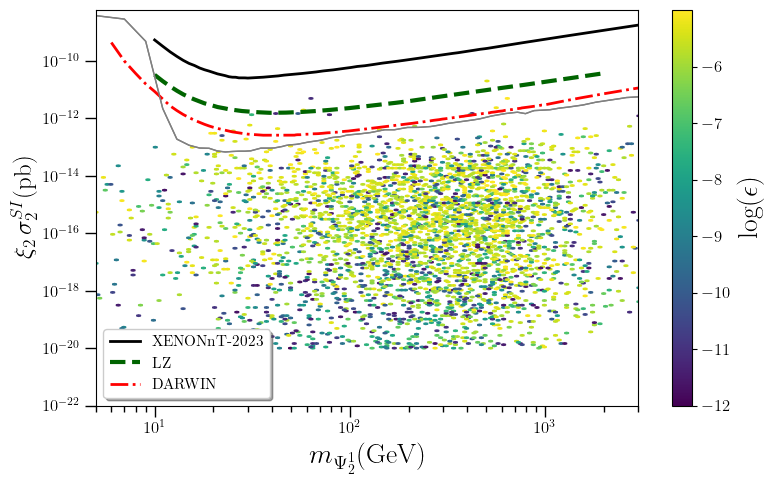

In [65]:
plt.figure(figsize=(8,5))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(tp.mXi_1, (tp.SIN2+1e-20), np.log10(tp.epsilon + 1.0e-12),\
           xscale='log',yscale='log',gridsize = 200)
a=plt.colorbar()
a.set_label(r'$\log(\epsilon)$',size=20)

#XENON1T
n=np.arange(10,5000)
plt.loglog(n,XENONnT(n)*1e+36,'k-',lw=2,label='XENONnT-2023')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n, LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='red',linestyle='-.',lw=2,label='DARWIN')


#Neutrino coherent scattering
n=np.arange(1,5.e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
#plt.fill_between(n,1.e-38,back,facecolor='grey',alpha=0.1,label='NCS')

plt.xlabel(r'$m_{\Psi_2^1}$(GeV)',size=20)
plt.ylabel(r'$\xi_2\,\sigma_2^{SI}$(pb)',size=18)
plt.legend(prop={'size':11},shadow=True,loc='lower left')
plt.xlim(5e0,3e3)
plt.ylim(1e-22,6e-9)

plt.tight_layout()
#plt.savefig('plots/SI2.pdf')
plt.show()

Conclusion:

All the points with $\epsilon < 10^{-6}$ fall in the neutrino floor-

The points wit $\theta < 10^{-5}$ show a good transition in color for $\epsilon$

## SD cross section

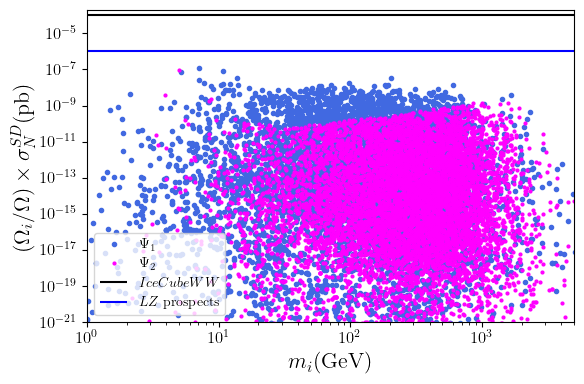

In [66]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mChi, (xd.Omega1/Omega)*xd.SDN1, color='royalblue', marker='o',ms=3,linestyle='', label=r'$\Psi_1$')
plt.loglog(xd.mXi_1, (xd.Omega2/Omega)*xd.SDN2, color='magenta', marker='o',ms=2,linestyle='', label=r'$\Psi_2$')

plt.hlines(1e-4,1e0,5e3, 'k',label=r'$Ice Cube WW$')
plt.hlines(1e-6,1e0,5e3, 'b',label=r'$LZ$ prospects')

plt.xlabel(r'$m_i$(GeV)',size=16)
plt.ylabel(r'$(\Omega_i/\Omega)\times\sigma_N^{SD}$(pb)',size=16)
plt.legend(prop={'size':10},loc='lower left')
plt.xlim(1e0,5e3)
plt.ylim(1e-21,2e-4)

plt.tight_layout()
plt.savefig('plots/SD.pdf')
#plt.show()

## Conversion and DM annihilation plots

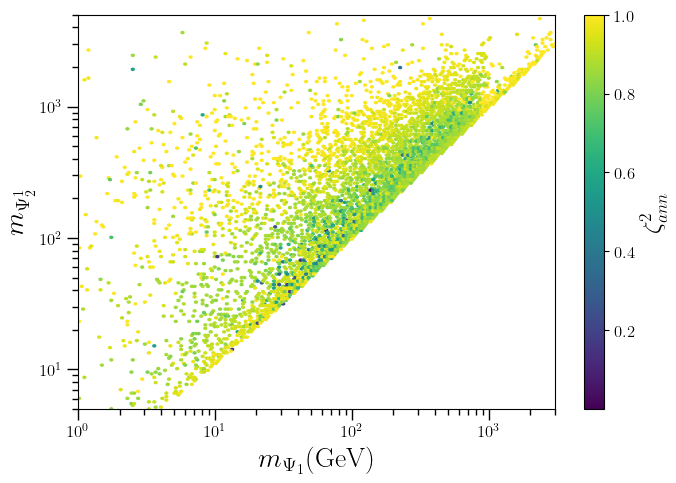

In [67]:
plt.figure(figsize=(7,5))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.mXi_1, (0*xd.svanni+1*xd.svanni2),xscale='log',yscale='log',gridsize = 250)
a=plt.colorbar()
a.set_label(r'$\zeta_{ann}^2$',size=18)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=20)
plt.ylabel(r'$m_{\Psi_2^1}$',size=20)
#plt.grid()

plt.xlim(1e0,3e3)
plt.ylim(5e0,5e3)

plt.tight_layout()
plt.savefig('plots/M12.pdf')
#plt.show()

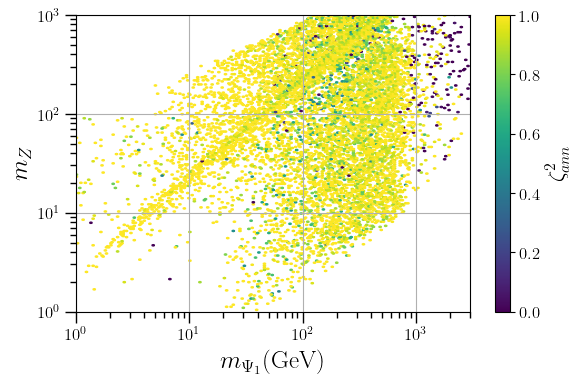

In [68]:
plt.figure(figsize=(6,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.MZp, (1*xd.svanni+0*xd.svanni2),xscale='log',yscale='log',gridsize = 250)
a=plt.colorbar()
a.set_label(r'$\zeta_{ann}^2$',size=16)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=18)
plt.ylabel(r'$m_{Z´}$',size=18)
plt.grid()

plt.xlim(1e0,3e3)
plt.ylim(1e0,1e3)

plt.tight_layout()
#plt.savefig('plots/M12.pdf')
#plt.show()

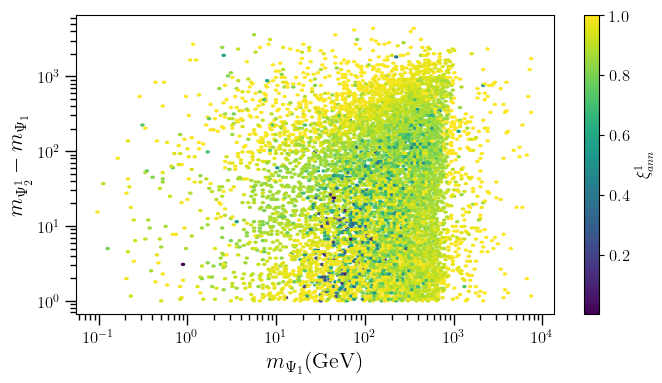

In [69]:
plt.figure(figsize=(7,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.mXi_1-xd.mChi, (xd.svanni2+0*xd.svanni),xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$m_{\Psi_2^1}-m_{\Psi_1}$',size=16)

plt.tight_layout()
plt.show()

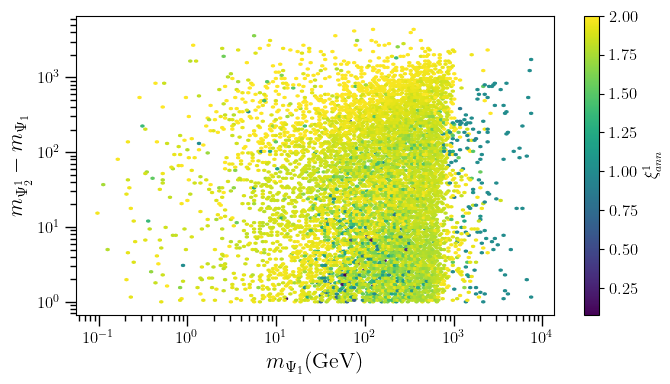

In [70]:
plt.figure(figsize=(7,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.mXi_1-xd.mChi, (xd.svanni+1*xd.svanni2),xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$m_{\Psi_2^1}-m_{\Psi_1}$',size=16)

plt.tight_layout()
plt.show()

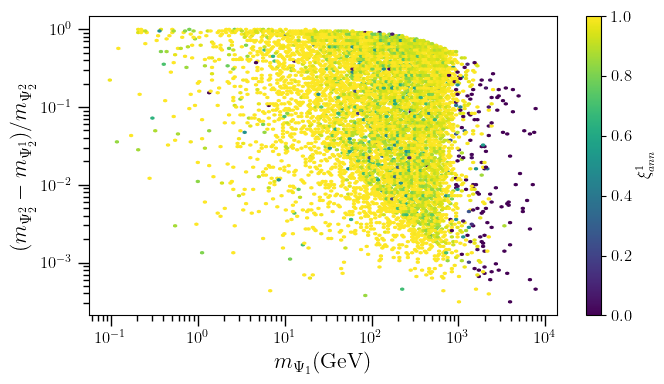

In [71]:
plt.figure(figsize=(7,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, (xd.mXi_2-xd.mXi_1)/xd.mXi_2, (xd.svanni+0*xd.svanni2),xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$(m_{\Psi_2^2}-m_{\Psi_2^1})/m_{\Psi_2^2}$',size=16)

plt.tight_layout()
plt.show()

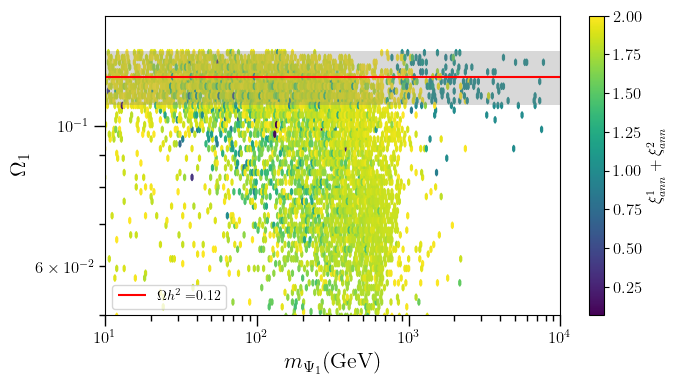

In [72]:
plt.figure(figsize=(7,4))

plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.Omega1, (xd.svanni+1*xd.svanni2),xscale='log',yscale='log',gridsize = 400)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1+\xi_{ann}^2$',size=12)

plt.hlines(Omega,0.1,1e4, 'r',label=r'$\Omega h^2=$0.12')
n=np.linspace(1e-1,1e4,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='grey',alpha=0.3,label='')


plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$\Omega_1$',size=16)
plt.legend(prop={'size':10},loc='lower left')
plt.ylim(5e-2,0.15)
plt.xlim(1e1,1e4)

plt.tight_layout()
plt.show()

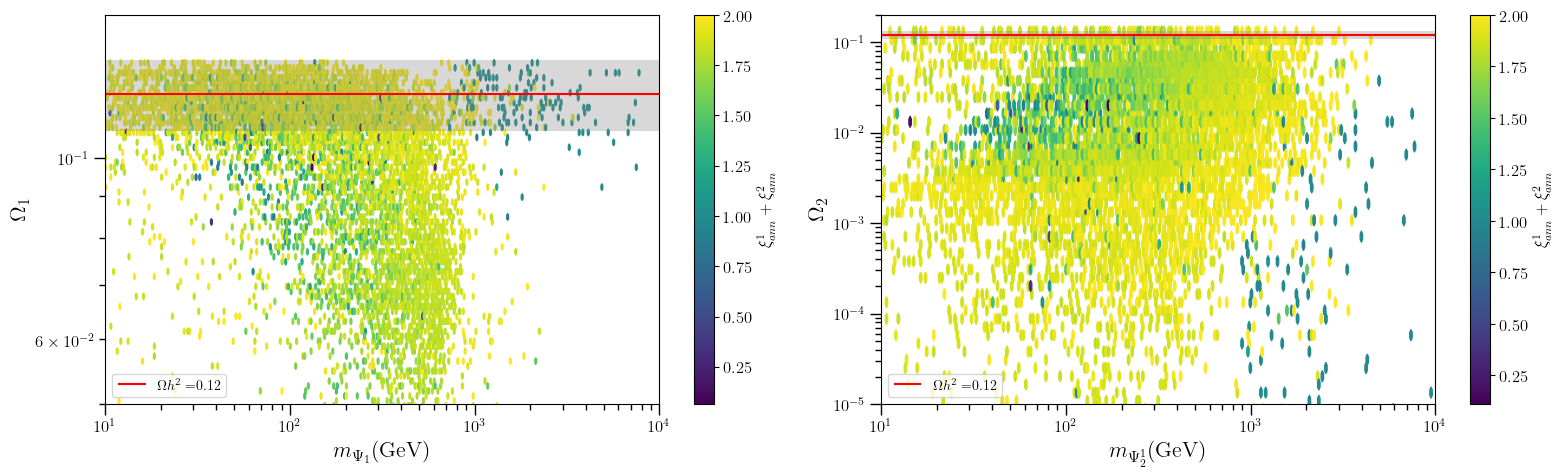

In [73]:
plt.figure(figsize=(16,9))

plt.subplot(221)
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.Omega1, (xd.svanni+1*xd.svanni2),xscale='log',yscale='log',gridsize = 500)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1+\xi_{ann}^2$',size=12)

plt.hlines(Omega,0.1,1e4, 'r',label=r'$\Omega h^2=$0.12')
n=np.linspace(1e1,1e4,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='grey',alpha=0.3,label='')


plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$\Omega_1$',size=16)
plt.legend(prop={'size':10},loc='lower left')
plt.ylim(5e-2,0.15)
plt.xlim(1e1,1e4)

plt.subplot(222)
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mXi_1, xd.Omega2, (xd.svanni+1*xd.svanni2), cmap='viridis',xscale='log',yscale='log',gridsize = 300)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1+\xi_{ann}^2$',size=12)

plt.hlines(Omega,0.1,1e4, 'r',label=r'$\Omega h^2=$0.12')
n=np.linspace(1e-1,1e4,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='grey',alpha=0.3,label='')

plt.xlabel(r'$m_{\Psi_2^1}$(GeV)',size=16)
plt.ylabel(r'$\Omega_2$',size=16)
plt.legend(prop={'size':10},loc='lower left')
plt.ylim(1e-5,0.2)
plt.xlim(1e1,1e4)

plt.tight_layout()
plt.show()

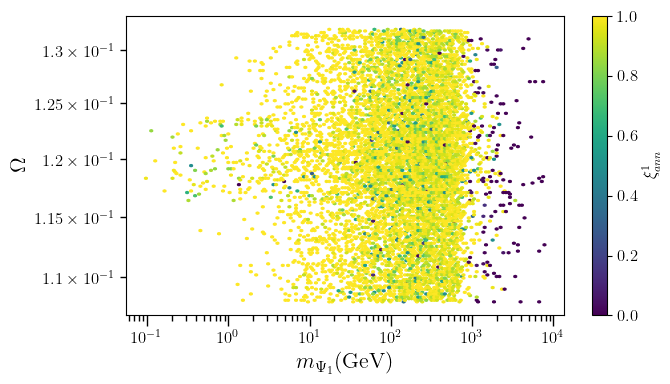

In [74]:
plt.figure(figsize=(7,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.Omega1+xd.Omega2, xd.svanni,xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$\Omega$',size=16)

#plt.ylim(1e-8,2)

plt.tight_layout()
plt.show()

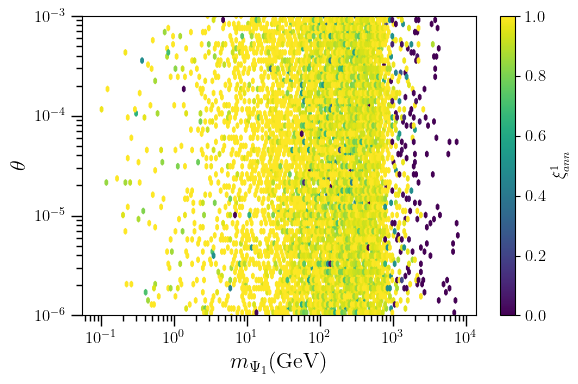

In [75]:
plt.figure(figsize=(6,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.theta+1e-10, xd.svanni,xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$\theta$',size=16)

plt.ylim(1e-6,1e-3)

plt.tight_layout()
plt.show()

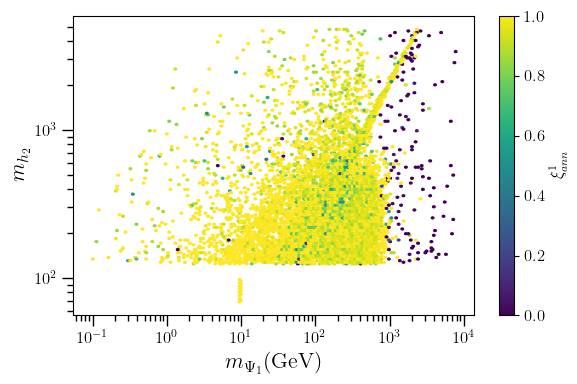

In [76]:
plt.figure(figsize=(6,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.mh2, xd.svanni,xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$m_{h_2}$',size=16)

#plt.ylim(1e-8,2)

plt.tight_layout()
plt.show()

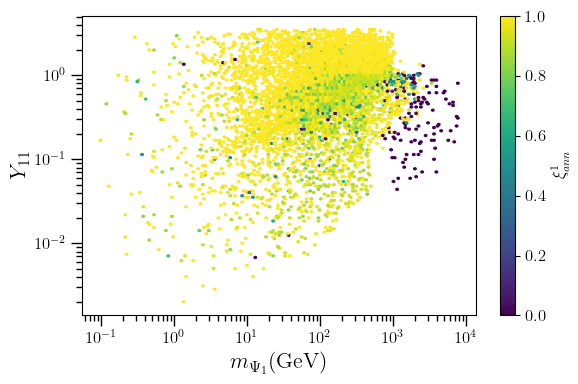

In [77]:
plt.figure(figsize=(6,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.YX11, xd.svanni,xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$Y_{11}$',size=16)

#plt.ylim(1e-8,2)

plt.tight_layout()
plt.show()

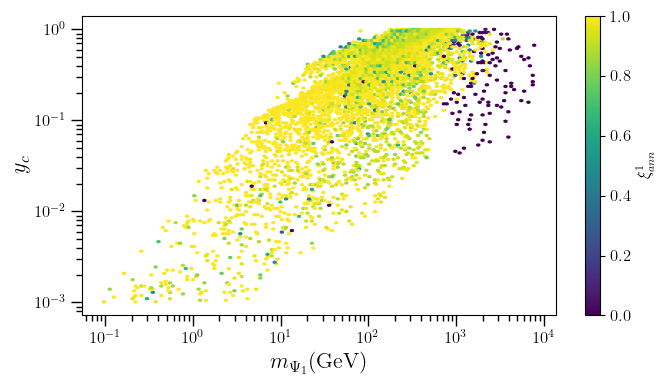

In [78]:
plt.figure(figsize=(7,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.Yc, xd.svanni,xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$y_c$',size=16)

#plt.ylim(1e-2,2)

plt.tight_layout()
plt.show()

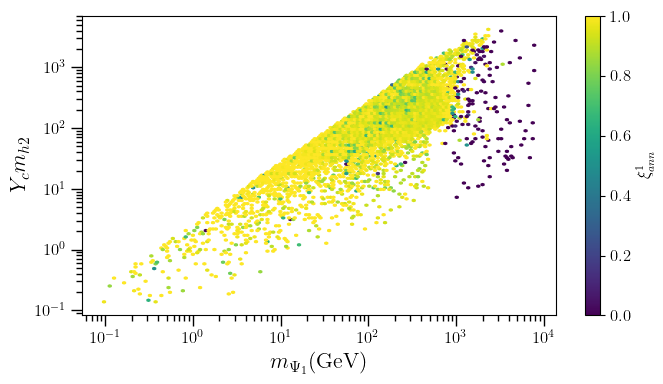

In [79]:
plt.figure(figsize=(7,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.Yc*xd.mh2, xd.svanni, xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$Y_c m_{h2}$',size=16)

#plt.ylim(1e-8,2)

plt.tight_layout()
plt.show()

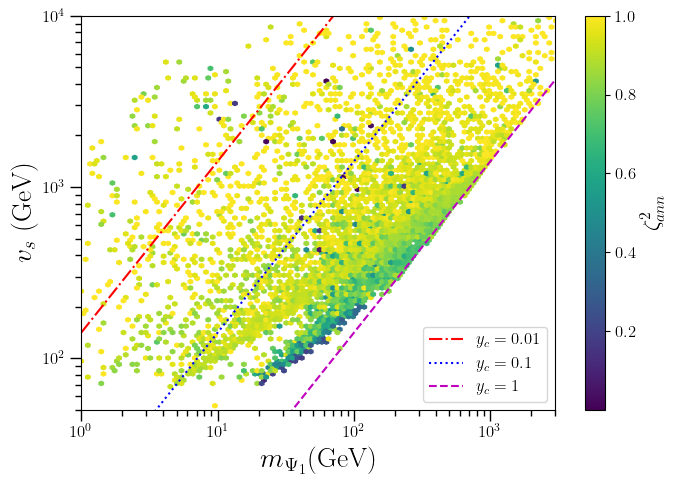

In [81]:
plt.figure(figsize=(7,5))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.vX, (0*xd.svanni+1*xd.svanni2),xscale='log',yscale='log', gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\zeta_{ann}^2$',size=16)

m=np.linspace(1,5e3,100)
plt.plot(m,m*np.sqrt(2.)/0.01,'r-.',label=r'$y_c=0.01$')
plt.plot(m,m*np.sqrt(2.)/0.1,'b:',label=r'$y_c=0.1$')
plt.plot(m,m*np.sqrt(2.)/1,'m--',label=r'$y_c=1$')

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=20)
plt.ylabel(r'$v_s$ (GeV)',size=20)
plt.legend(prop={'size':12},loc='lower right')

plt.xlim(1e0,3e3)
plt.ylim(5e1,1e4)
#plt.grid()

plt.tight_layout()
plt.savefig('plots/vsM1.pdf')
#plt.show()

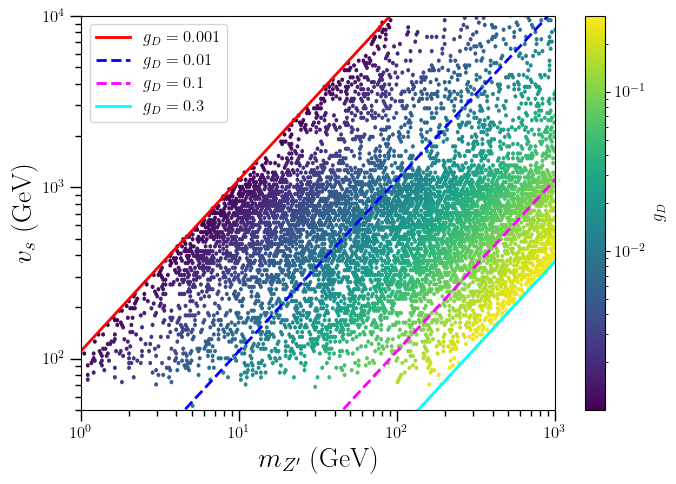

In [82]:
plt.figure(figsize=(7,5))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.MZp, xd.vX, xd.g1p,xscale='log',yscale='log',bins='log', gridsize = 200)
a=plt.colorbar()
a.set_label(r'$g_D$',size=12)

m=np.linspace(1,5e3,100)
#color='royalblue', marker='o',ms=3,linestyle=''
plt.plot(m,m/(9*0.001),color='red',linewidth=2.0,linestyle='-',label=r'$g_D=0.001$')
plt.plot(m,m/(9*0.01),color='blue',linewidth=2.0,linestyle='--',label=r'$g_D=0.01$')
plt.plot(m,m/(9*0.1),color='magenta',linewidth=2.0,linestyle='--',label=r'$g_D=0.1$')
plt.plot(m,m/(9*0.3),color='cyan',linewidth=2.0,linestyle='-',label=r'$g_D=0.3$')

plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)',size=20)
plt.ylabel(r'$v_s$ (GeV)',size=20)
plt.legend(prop={'size':12},loc='upper left')

plt.xlim(1e0,1e3)
plt.ylim(5e1,1e4)

#plt.grid()

plt.tight_layout()
plt.savefig('plots/vsMZ.pdf')
#plt.show()

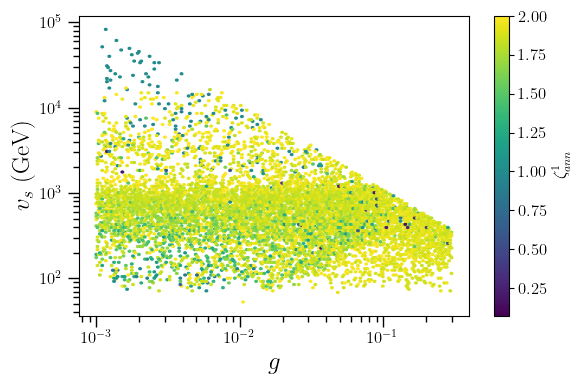

In [66]:
plt.figure(figsize=(6,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.g1p, xd.vX, (1*xd.svanni+1*xd.svanni2),xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\zeta_{ann}^1$',size=12)


plt.xlabel(r'$g$',size=18)
plt.ylabel(r'$v_s$ (GeV)',size=18)
#plt.legend(prop={'size':12},loc='upper left')

#plt.xlim(1e0,1e3)
#plt.ylim(5e1,1e4)

#plt.ylim(1e-8,2)
#plt.grid()

plt.tight_layout()
plt.show()

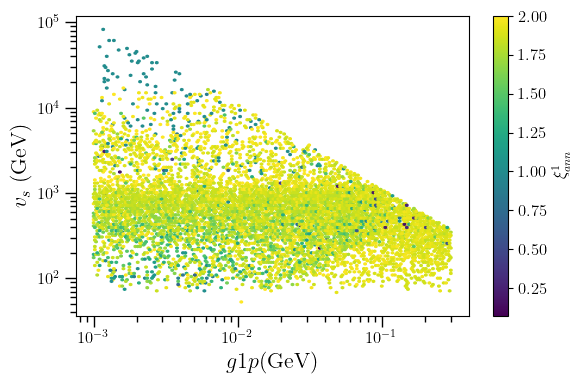

In [83]:
plt.figure(figsize=(6,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.g1p, xd.vX, (xd.svanni+1*xd.svanni2),xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$g1p$(GeV)',size=16)
plt.ylabel(r'$v_s$ (GeV)',size=16)

#plt.ylim(1e-8,2)
#plt.grid()

plt.tight_layout()
plt.show()

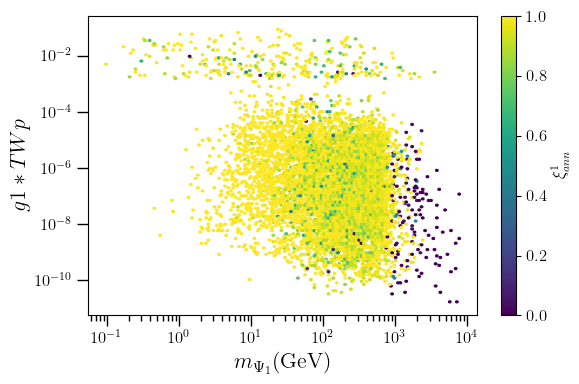

In [68]:
plt.figure(figsize=(6,4))
plt.minorticks_on()
plt.tick_params('both', length=8, width=1, which='major')
plt.tick_params('both', length=4, width=1, which='minor')

plt.hexbin(xd.mChi, xd.g1p*np.abs(xd.TWpSPheno+1e-8), xd.svanni,xscale='log',yscale='log',gridsize = 150)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=16)
plt.ylabel(r'$g1*TWp$',size=16)

#plt.ylim(0.0000001,0.2)

plt.tight_layout()
plt.show()

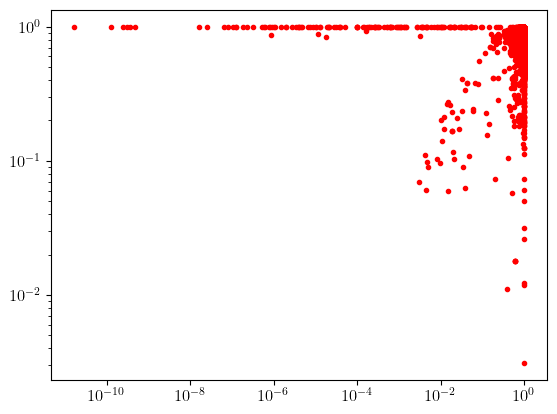

In [69]:
plt.loglog(xd.svanni,xd.svanni2, 'r.' )

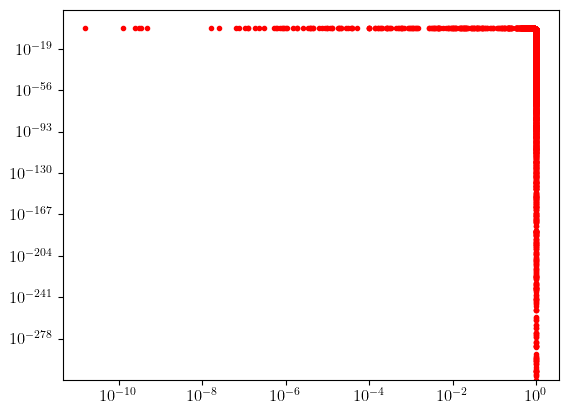

In [70]:
plt.loglog(xd.svanni,xd.svconv, 'r.' )

## $\sigma v$ today

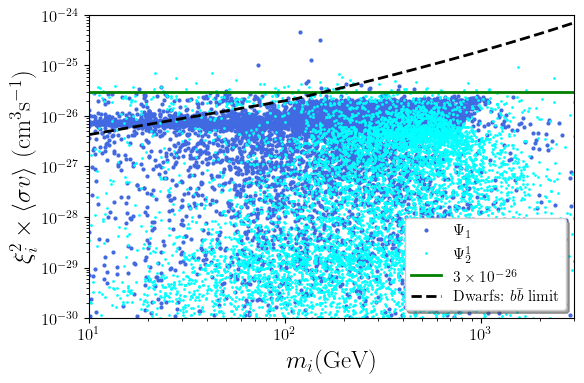

In [85]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mChi, (xd.Omega1/Omega)**2*xd.sv, color='royalblue', marker='o',ms=2,linestyle='',label='$\Psi_1$')
plt.loglog(xd.mXi_1, (xd.Omega2/Omega)**2*xd.sv, color='cyan', marker='.',ms=2,linestyle='',label='$\Psi_2^1$')

#plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(10,1e4,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'g',lw=2,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=2,label=r'Dwarfs: $b\bar{b}$ limit')
#plt.semilogy(m,sigmav_ww_fit(m),'g-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.xlabel(r'$m_i$(GeV)',size=18)
plt.ylabel(r'$\xi_i^2\times\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=18)
plt.legend(prop={'size':11},shadow=True,loc='lower right')
plt.xlim(1e1,3e3)
plt.ylim(1e-30,1e-24)

plt.tight_layout()
plt.savefig('plots/sv.pdf')
#plt.show()

### Kinetic mixing: vector portal

\begin{align}
\sigma^{SI}_{\chi N}= \dfrac{1}{4\pi}\dfrac{M_N^2m_{\chi^0}^2}{(M_N+m_{\chi^0})^2}\dfrac{g_{eff}^2}{M_{Z'}^4}B^2
\approx\dfrac{1}{4\pi}\dfrac{M_N^2m_{\chi^0}^2}{(M_N+m_{\chi^0})^2}\dfrac{(\epsilon\,g'\,g_D)^2}{M_{Z'}^4}B^2
\end{align}

https://arxiv.org/pdf/1409.8165.pdf

Plot $\epsilon$ vs $MZ^{\prime}$

In [86]:
def EpsMZp(mx,SigmaXe,MZp,yx):
    gp = 0.3466626087885593

    MNn = 0.93956
    Mr = MNn*mx/(MNn+mx)
    GeVtomin2topb = 390570076.08305097
    
    eps = np.sqrt(SigmaXe*648.*np.pi*1e+36/GeVtomin2topb)*(mx*MZp)/(yx*Mr*gp)
    return eps

In [87]:
EpsMZp(mx=100,SigmaXe=1E-10,MZp=80.,yx=0.01)

5.660213726674536e+16

In [88]:
k = np.arange(7,1e3,50)

In [89]:
XENONnT(100)*1e+36

5.888489998472127e-11

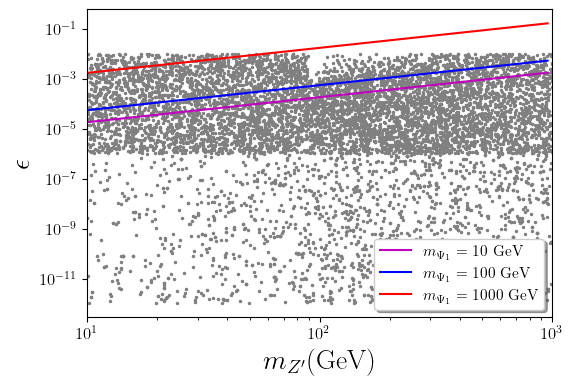

In [90]:
plt.figure(figsize=(6,4))

plt.loglog(xd.MZp, xd.epsilon, color='grey', marker='.',ms=3,linestyle='')

#plt.loglog(xdNeff.MZp, xdNeff.epsilon, color='black', marker='.',ms=3,linestyle='')

plt.plot(k, EpsMZp(mx=10,SigmaXe=XENONnT(10),MZp=k,yx=1), 'm-',label='$m_{\Psi_1}=10$ GeV')
plt.plot(k, EpsMZp(mx=100,SigmaXe=XENONnT(100),MZp=k,yx=1), 'b-',label='$m_{\Psi_1}=100$ GeV')
plt.plot(k, EpsMZp(mx=1000,SigmaXe=XENONnT(1000),MZp=k,yx=1), 'r-',label='$m_{\Psi_1}=1000$ GeV')

plt.xlabel(r'$m_{Z^{\prime}}$(GeV)',size=20)
plt.ylabel(r'$\epsilon$',size=20)
plt.legend(prop={'size':11},shadow=True,loc='lower right')

plt.xlim(10,1e3)
#plt.ylim(1e-12,1e-1)

#plt.tight_layout()
plt.show()

In [91]:
kkk = xd[np.logical_and(xd.mChi <100.3,  xd.mChi >99.8)]

In [92]:
kkk[['mChi','MZp','epsilon','Yc','SIN1']]

mChi         MZp   epsilon        Yc          SIN1
1498  100.206620    5.417787  0.000011  0.485016  5.183000e-17
2860  100.054564  219.994787  0.000248  0.100087  1.001000e-14
2959   99.808328  394.633150  0.000001  0.375395  4.952000e-17
3321  100.297368  233.766697  0.000320  0.159381  2.673000e-14
4221   99.844051  316.444522  0.000004  0.327102  2.552000e-16
4765   99.974603    4.434595  0.001015  0.498836  4.253000e-13
5797   99.921900  256.537866  0.001968  0.256712  2.125000e-12
6796   99.977599  217.708423  0.000009  0.041162  2.806000e-18

Plot $\epsilon$ vs $m_{\Psi_1}$

In [93]:
def contourEM(m,SigmaXe,MZp,gD):
    gp = 0.3466626087885593
    #MZp = 200.
    #gD = 0.1
    MNn = 0.93956
    Mr = MNn*m/(MNn+m)
    GeVtomin2topb = 390570076.08305097
    
    eps = np.sqrt(4.*np.pi*MZp**4*SigmaXe/(Mr*gp*gD)**2)
    return eps

In [94]:
mm = 10
contourEM(mm,XENONnT(mm)*1e+36/GeVtomin2topb,200,0.1)

0.0056134546228710945

some lines

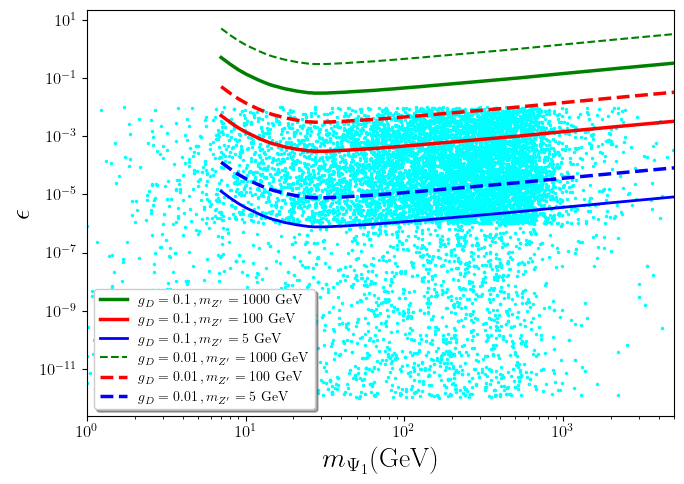

In [95]:
plt.figure(figsize=(7,5))

plt.loglog(xd.mChi, xd.epsilon, color='cyan', marker='.',ms=3,linestyle='', label=r'')

n = np.arange(7,5e3)
plt.loglog(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1000.,0.1),'g-',lw=2.5, label=r'$g_D=0.1\,, m_{Z^{\prime}}=1000$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,100.,0.1),'r-',lw=2.5, label=r'$g_D=0.1\,, m_{Z^{\prime}}=100$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,5,0.1),'b-',lw=2, label=r'$g_D=0.1\,, m_{Z^{\prime}}=5$ GeV')

plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1000.,0.01),'g--', label=r'$g_D=0.01\,, m_{Z^{\prime}}=1000$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,100.,0.01),'r--',lw=2.5, label=r'$g_D=0.01\,, m_{Z^{\prime}}=100$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,5,0.01),'b--',lw=2.5, label=r'$g_D=0.01\,, m_{Z^{\prime}}=5$ GeV')

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=20)
plt.ylabel(r'$\epsilon$',size=20)
plt.legend(prop={'size':10},shadow=True,loc='best')
plt.xlim(1,5e3)
#plt.ylim(5e-7,2e-1)
#plt.grid()


plt.tight_layout()
#plt.show()

to paper

In [96]:
#Only DM1
c1 = xd[np.logical_and(xd.g1p < 0.1+0.05, xd.g1p > 0.1-0.05)]
xdKM=c1[np.logical_and(c1.MZp>97. , c1.MZp <105.)]

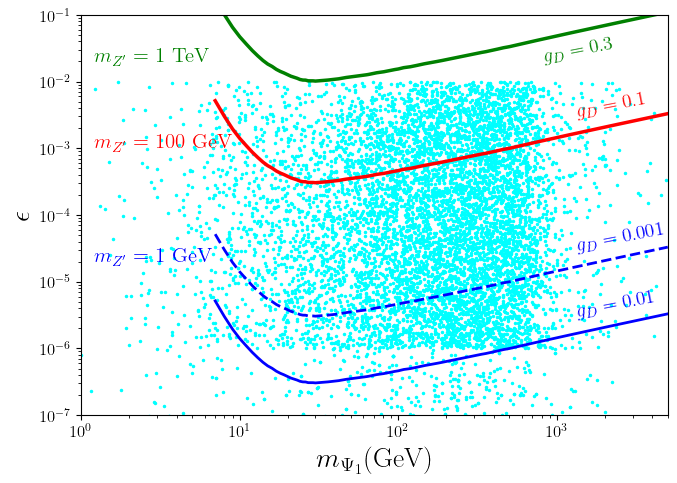

In [97]:
plt.figure(figsize=(7,5))

plt.loglog(xd.mChi, xd.epsilon, color='cyan', marker='.',ms=3,linestyle='', label=r'')
#plt.loglog(xdKM.mChi, xdKM.epsilon, color='black', marker='.',ms=3,linestyle='', label=r'')

n = np.arange(7,5e3)
plt.loglog(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1000.,0.3),'g-',lw=2.5, label=r'$g_D=0.3\,, m_{Z^{\prime}}=1000$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,100.,0.1),'r-',lw=2.5, label=r'$g_D=0.1\,, m_{Z^{\prime}}=100$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1,0.001),'b--',lw=2, label=r'$g_D=0.01\,, m_{Z^{\prime}}=1$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1,0.01),'b-',lw=2, label=r'$g_D=0.01\,, m_{Z^{\prime}}=1$ GeV')

#MASS
plt.text(1.2,2e-2,r'$m_{Z^{\prime}}=1$ TeV',color='green', fontsize=15)
plt.text(1.2,1e-3,r'$m_{Z^{\prime}}=100$ GeV',color='red', fontsize=15)
plt.text(1.2,2e-5,r'$m_{Z^{\prime}}=1$ GeV',color='blue', fontsize=15)

plt.text(800,2e-2,r'$g_D=0.3$', color='green', rotation=11, fontsize=14)
plt.text(1.3e3,3e-3,r'$g_D=0.1$', color='red', rotation=11, fontsize=14)
plt.text(1.3e3,3e-6,r'$g_D=0.01$', color='blue', rotation=11, fontsize=14)
plt.text(1.3e3,3e-5,r'$g_D=0.001$', color='blue', rotation=11, fontsize=14)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=20)
plt.ylabel(r'$\epsilon$',size=20)
#plt.legend(prop={'size':10},shadow=True,loc='best')
plt.xlim(1,5e3)
plt.ylim(1e-7,1e-1)
#plt.grid()

plt.tight_layout()
#plt.savefig('plots/epsilonM1.pdf')
#plt.show()

new plot

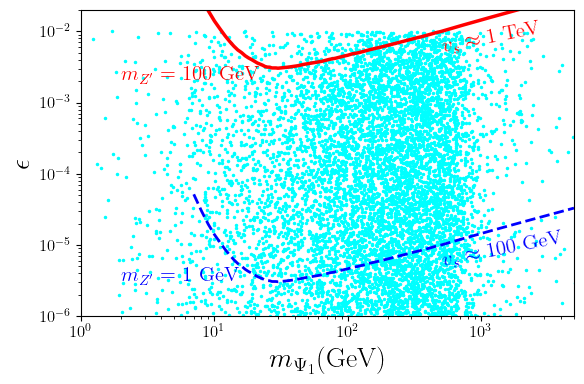

In [99]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mChi, xd.epsilon, color='cyan', marker='.',ms=3,linestyle='', label=r'')
#plt.loglog(xdKM.mChi, xdKM.epsilon, color='black', marker='.',ms=3,linestyle='', label=r'')

n = np.arange(7,5e3)
#plt.loglog(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1000.,0.3),'g-',lw=2.5, label=r'$g_D=0.3\,, m_{Z^{\prime}}=1000$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,100.,0.01),'r-',lw=2.5, label=r'$g_D=0.1\,, m_{Z^{\prime}}=100$ GeV')
#plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1,0.001),'b--',lw=2, label=r'$g_D=0.01\,, m_{Z^{\prime}}=1$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1,0.001),'b--',lw=2, label=r'$g_D=0.01\,, m_{Z^{\prime}}=1$ GeV')

#MASS
#plt.text(1.2,2e-2,r'$m_{Z^{\prime}}=1$ TeV',color='green', fontsize=15)
plt.text(2,2e-3,r'$m_{Z^{\prime}}=100$ GeV',color='red', fontsize=15)
plt.text(2,3e-6,r'$m_{Z^{\prime}}=1$ GeV',color='blue', fontsize=15)

#plt.text(800,2e-2,r'$g_D=0.3$', color='green', rotation=11, fontsize=14)
plt.text(5.0e2,5e-3,r'$v_s\approx 1$ TeV', color='red', rotation=11, fontsize=15)
plt.text(5.0e2,5e-6,r'$v_s\approx 100$ GeV', color='blue', rotation=11, fontsize=15)
#plt.text(1.3e3,3e-5,r'$g_D=0.001$', color='blue', rotation=11, fontsize=14)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=20)
plt.ylabel(r'$\epsilon$',size=20)
#plt.legend(prop={'size':10},shadow=True,loc='best')
plt.xlim(1,5e3)
plt.ylim(1e-6,2e-2)
#plt.grid()

plt.tight_layout()
plt.savefig('plots/epsilonM1.pdf')
#plt.show()

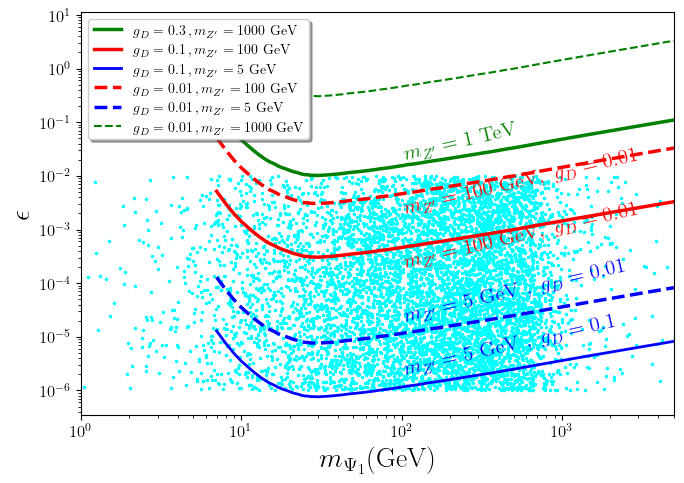

In [288]:
plt.figure(figsize=(7,5))

plt.loglog(xd.mChi, xd.epsilon, color='cyan', marker='.',ms=3,linestyle='', label=r'')

n = np.arange(7,5e3)
plt.loglog(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1000.,0.3),'g-',lw=2.5, label=r'$g_D=0.3\,, m_{Z^{\prime}}=1000$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,100.,0.1),'r-',lw=2.5, label=r'$g_D=0.1\,, m_{Z^{\prime}}=100$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,5,0.1),'b-',lw=2, label=r'$g_D=0.1\,, m_{Z^{\prime}}=5$ GeV')

plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,100.,0.01),'r--',lw=2.5, label=r'$g_D=0.01\,, m_{Z^{\prime}}=100$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,5,0.01),'b--',lw=2.5, label=r'$g_D=0.01\,, m_{Z^{\prime}}=5$ GeV')
plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1000.,0.01),'g--', label=r'$g_D=0.01\,, m_{Z^{\prime}}=1000$ GeV')
#plt.plot(n,contourEM(mm,XENONnT(n)*1e+36/GeVtomin2topb,1000.,0.01),'m--', label=r'$g_D=0.01\,, m_{Z^{\prime}}=1000$ GeV')

plt.text(1e2,2e-5,r'$m_{Z^{\prime}}=5$ GeV ,\, $g_D=0.01$', color='blue', rotation=13, fontsize=15)
plt.text(1e2,2e-6,r'$m_{Z^{\prime}}=5$ GeV ,\, $g_D=0.1$', color='blue', rotation=13, fontsize=15)
plt.text(1e2,2e-3,r'$m_{Z^{\prime}}=100$ GeV,\, $g_D=0.01$', color='red', rotation=13, fontsize=15)
plt.text(1e2,2e-4,r'$m_{Z^{\prime}}=100$ GeV,\, $g_D=0.01$', color='red', rotation=13, fontsize=15)
plt.text(1e2,2e-2,r'$m_{Z^{\prime}}=1$ TeV', color='green', rotation=13, fontsize=15)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=20)
plt.ylabel(r'$\epsilon$',size=20)
plt.legend(prop={'size':10},shadow=True,loc='best')
plt.xlim(1,5e3)
#plt.ylim(5e-7,2e-1)
#plt.grid()

plt.tight_layout()
#plt.savefig('plots/epsilonM1.pdf')
plt.show()

In [32]:
dg=0.003
print(0.01-dg, 0.01+dg)

0.009000000000000001 0.011


In [409]:
gd= 0.003
yd = xd[np.logical_and(xd.g1p >(0.01-dg) , xd.g1p < (0.01+dg))]

In [410]:
print(yd.g1p.min(),yd.g1p.max())

0.0090024611187862 0.0109978218495139


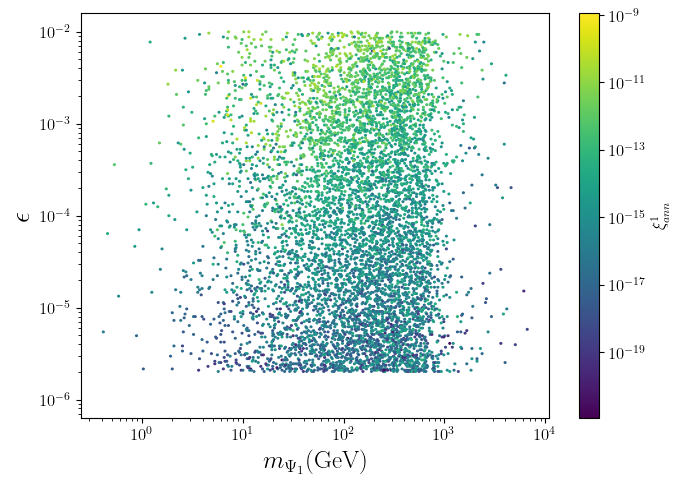

In [420]:
plt.figure(figsize=(7,5))

plt.hexbin(xd.mChi,  xd.epsilon+1e-6,  xd.SIN1,  xscale='log', yscale='log',bins='log',gridsize = 250)
a=plt.colorbar()
a.set_label(r'$\xi_{ann}^1$',size=12)

plt.xlabel(r'$m_{\Psi_1}$(GeV)',size=18)
plt.ylabel(r'$\epsilon$',size=20)
#plt.legend(prop={'size':12},loc='best')
#plt.xlim(1,2e3)
#plt.ylim(1e-20,1e-10)
#plt.grid()

plt.tight_layout()
#plt.savefig('plots/epsilonM1.pdf')
plt.show()

fix masses for mChi

In [42]:
def eplot(mDM,B,MZp):
    k = np.sqrt(XENONnT(mDM)*(1e+36/GeVtomin2topb)*4.*np.pi*((MNn+mDM)/(MNn*mDM))**2/(B*gp)**2*MZp**4)
    
    return(k)

In [43]:
eplot(500,1,1)

9.12149371677755e-09

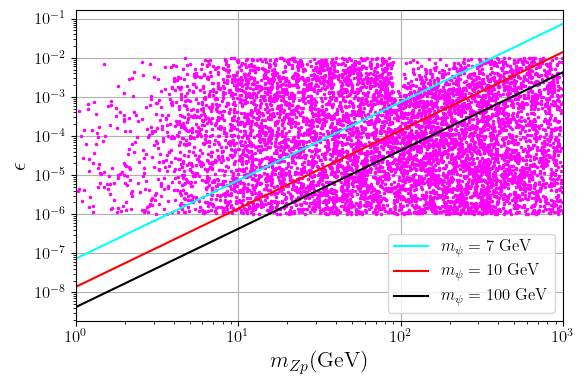

In [45]:
plt.figure(figsize=(6,4))

plt.loglog(xd.MZp, xd.epsilon, color='magenta', marker='.',ms=3,linestyle='', label=r'')
#plt.loglog(xd.MZp, xd.epsilon*np.sqrt(xd.Omega1/Omega), color='black', marker='o',ms=3,linestyle='', label=r'')

n=np.arange(1,1e3,30)
plt.loglog(n, eplot(6.5,1,n), color='cyan', linestyle='-', label=r'$m_{\psi}=7$ GeV')
plt.loglog(n, eplot(10,1,n), color='red', linestyle='-', label=r'$m_{\psi}=10$ GeV')
plt.loglog(n, eplot(100,1,n), color='black', linestyle='-', label=r'$m_{\psi}=100$ GeV')


plt.xlabel(r'$m_{Zp}$(GeV)',size=16)
plt.ylabel(r'$\epsilon$',size=16)
plt.legend(prop={'size':12},loc='best')
plt.xlim(1,1e3)
#plt.ylim(1e-17,1e-6)
plt.grid()

plt.tight_layout()
#plt.savefig('plots/SI-xi.pdf')
plt.show()

### New Weinberg angle $\theta'_w$

Followint JHEP 07 (2018) 094

https://link.springer.com/article/10.1007/JHEP07(2018)094

\begin{align}
\tan(2\xi) = \dfrac{2\epsilon'\sin\theta_w}{1-\delta} + O(\epsilon^{'2})
\end{align}

where, $\delta=\dfrac{M_{Z'}^2}{M_Z^2}$

In [54]:
MZ = 91.1887

xd['delta']=(xd['MZp']/MZ)**2

sw2 = 0.22359779321117756

xd['TWp_analitic'] = np.arctan(2.*xd['epsilon']*np.sqrt(sw2)/(1.-xd['delta']))/2.

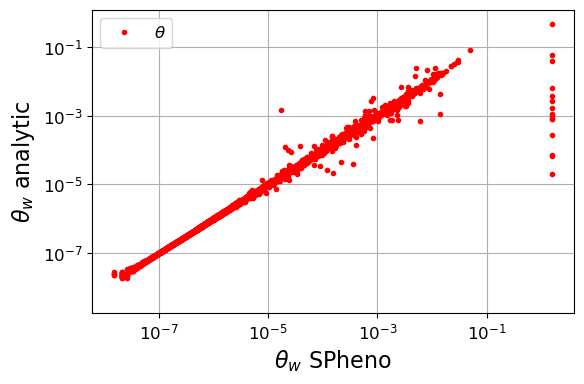

In [55]:
plt.figure(figsize=(6,4))

plt.loglog(np.abs(xd['TWpSPheno']), np.abs(xd['TWp_analitic']),'r.',label=r'$\theta$')

plt.xlabel(r'$\theta_w$ SPheno',size=16)
plt.ylabel(r'$\theta_w$ analytic',size=16)
plt.legend()
plt.grid()

plt.tight_layout()

### Anomaly magnetic muon momenta

$a_{\mu}=\dfrac{(g-2)\mu}{2}=116592040(54)\times 10^{-11}$ Fermilab

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


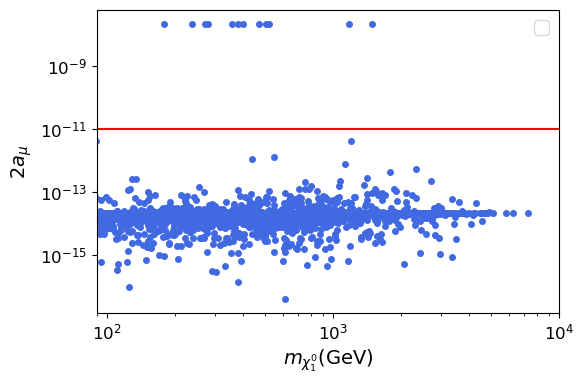

In [56]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mXi_1, xd.g2mu, color='royalblue', marker='o',ms=4,linestyle='',label='')

plt.hlines(1e-11,1e-3,1e4,'r')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=14)
plt.ylabel(r'$2 a_{\mu}$',size=14)
plt.legend(prop={'size':14},loc='best')
plt.xlim(90,1e4)

plt.tight_layout()
#plt.savefig('plots/g2mu.pdf')
plt.show()

## Scan random parameters

In [57]:
xDM = xd

In [62]:
dec1.columns

Index(['Lam1', 'Lam2', 'Lam3', 'Lam4', 'Lam5', 'Lam6', 'Lam7', 'Lam8', 'Lam9',
       'Lam10',
       ...
       'svanni2', 'svconv2', 'mrChi', 'mrXi_1', 'SIZp_Chi', 'SIZp_Xi',
       'SIZ_Chi', 'SIZ_Xi', 'delta', 'TWp_analitic'],
      dtype='object', length=105)

In [63]:
#Decouple spetrum
dec1 = xDM[np.logical_and(xDM['mXi_1']-xDM['mChi']>3e2, xDM.Omega1 > Omega_min)]
decouple = dec1[np.logical_and(dec1.MZp<dec1.mChi, dec1.mh2 >150)]
#decouple = xDM[xDM.Omega1 > Omega_min]

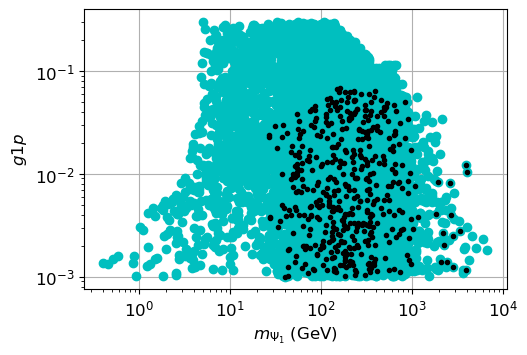

In [64]:
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.g1p,'co',label=r'')
#plt.loglog(xDM['mXi_1'], xDM.g1p,'r.',label=r'$g1p$')
plt.loglog(decouple['mChi'], decouple.g1p,'k.',label=r'')

plt.ylabel(r'$g1p$',size=12)
plt.xlabel(r'$m_{\Psi_1}$ (GeV)',size=12)
#plt.legend(prop={'size':10},loc='best')
plt.grid()

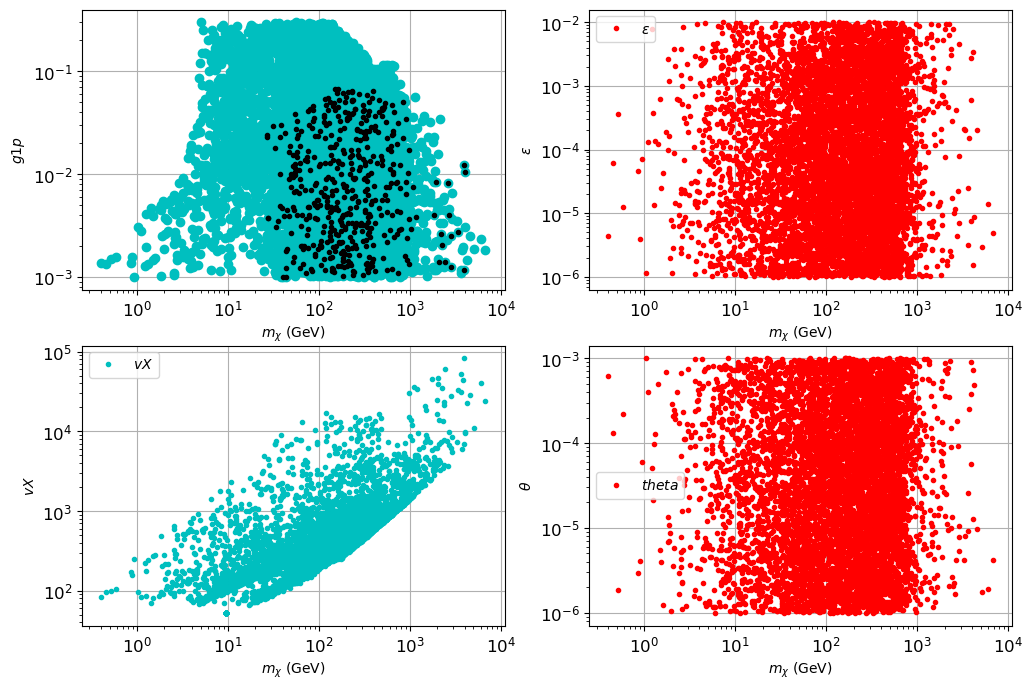

In [65]:
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.g1p,'co',label=r'$g1p$')
#plt.loglog(xDM['mXi_1'], xDM.g1p,'r.',label=r'$g1p$')
plt.loglog(decouple['mChi'], decouple.g1p,'k.',label=r'')

plt.ylabel(r'$g1p$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.epsilon,'r.',label=r'$\epsilon$')
plt.ylabel(r'$\epsilon$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.vX,'c.',label=r'$vX$')
plt.ylabel(r'$vX$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(224)
plt.loglog(xDM['mChi'], xDM.theta,'r.',label=r'$theta$')
plt.ylabel(r'$\theta$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

$v_X$ low for low masses and $g_{B}$ big for los masses

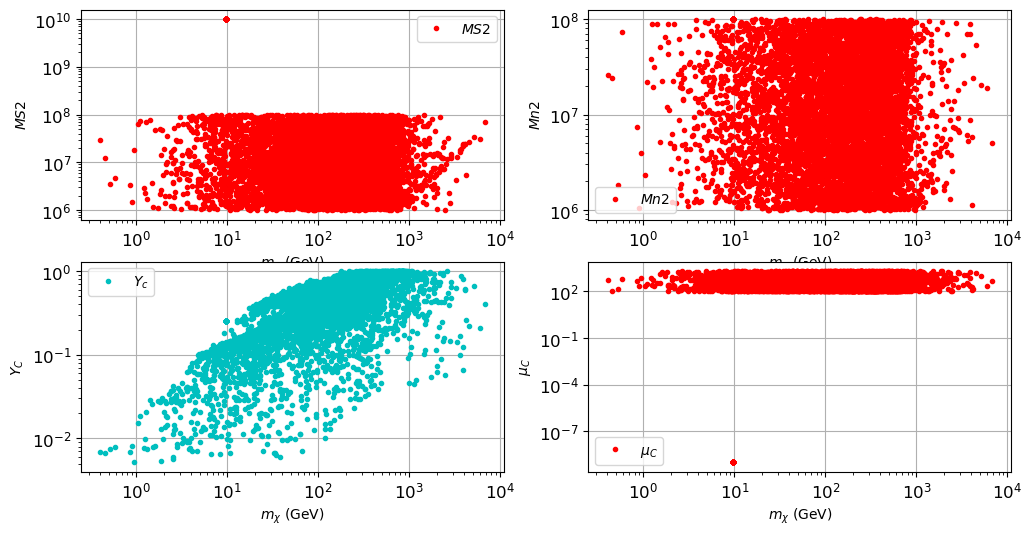

In [66]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.MS2,'r.',label=r'$MS2$')
plt.ylabel(r'$MS2$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.Mn2,'r.',label=r'$Mn2$')
plt.ylabel(r'$Mn2$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.Yc,'c.',label=r'$Y_c$')
plt.ylabel(r'$Y_C$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(224)
plt.loglog(xDM['mChi'], xDM.muC,'r.',label=r'$\mu_C$')
plt.ylabel(r'$\mu_C$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

$Y_c$ big for low masses

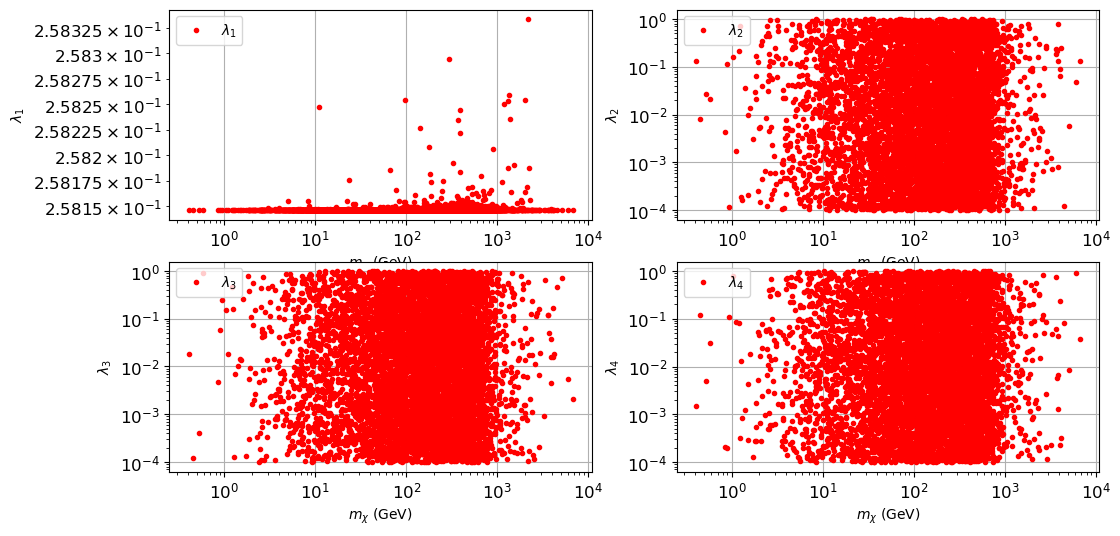

In [67]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.Lam1,'r.',label=r'$\lambda_1$')
plt.ylabel(r'$\lambda_1$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.Lam2,'r.',label=r'$\lambda_2$')
plt.ylabel(r'$\lambda_2$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.Lam3,'r.',label=r'$\lambda_3$')
plt.ylabel(r'$\lambda_3$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(224)
plt.loglog(xDM['mChi'], xDM.Lam4,'r.',label=r'$\lambda_4$')
plt.ylabel(r'$\lambda_4$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

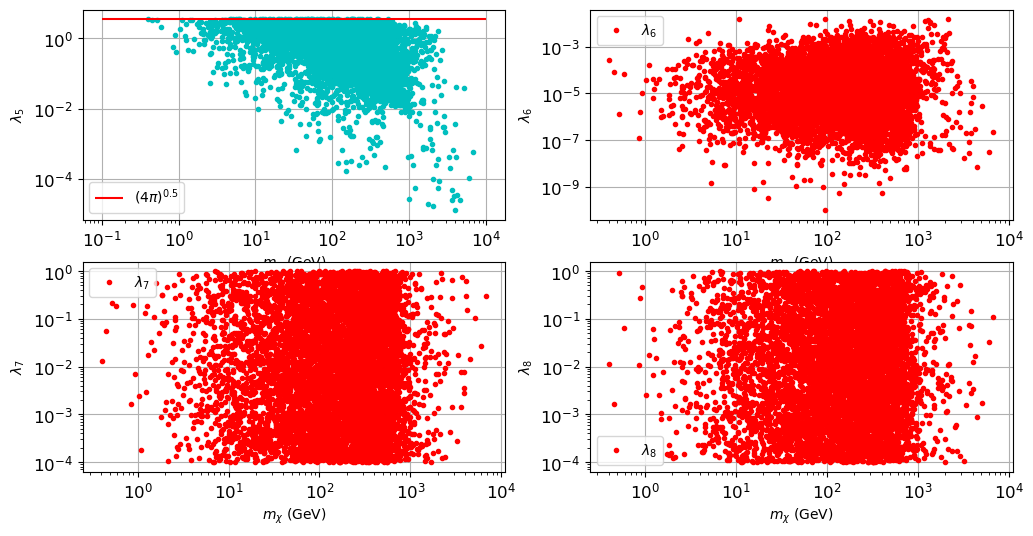

In [68]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.Lam5,'c.',label=r'')
#plt.loglog(xDM['mXi_1'], xDM.Lam5,'c.',label=r'')
plt.hlines(np.sqrt(4*np.pi),0.1,1e4, 'r',label=r'$(4\pi)^{0.5}$')
plt.ylabel(r'$\lambda_5$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.Lam6,'r.',label=r'$\lambda_6$')
plt.ylabel(r'$\lambda_6$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.Lam7,'r.',label=r'$\lambda_7$')
plt.ylabel(r'$\lambda_7$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(224)
plt.loglog(xDM['mChi'], xDM.Lam8,'r.',label=r'$\lambda_8$')
plt.ylabel(r'$\lambda_8$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

$\lambda_5$ no perturbative

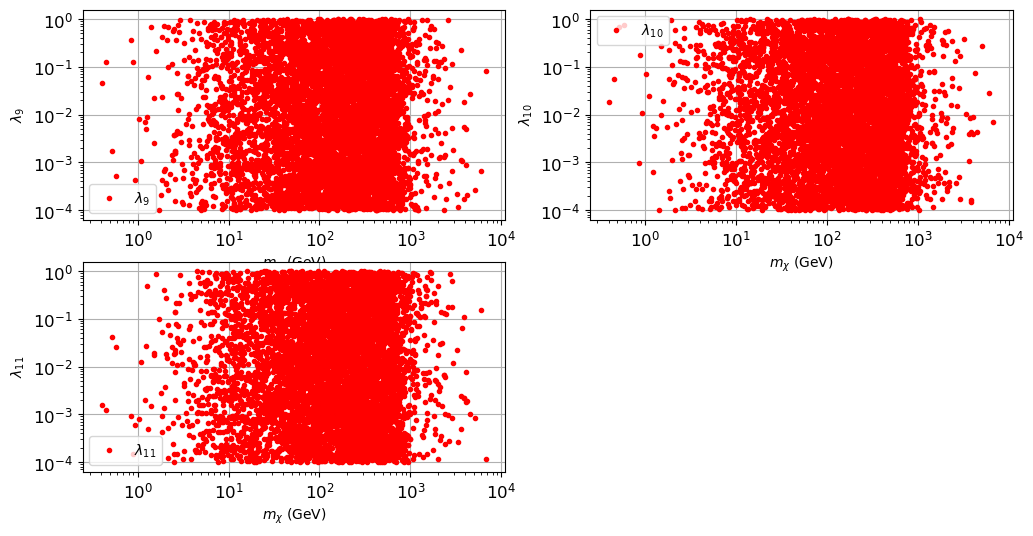

In [69]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xDM['mChi'], xDM.Lam9,'r.',label=r'$\lambda_9$')
plt.ylabel(r'$\lambda_9$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(222)
plt.loglog(xDM['mChi'], xDM.Lam10,'r.',label=r'$\lambda_{10}$')
plt.ylabel(r'$\lambda_{10}$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

plt.subplot(223)
plt.loglog(xDM['mChi'], xDM.Lam11,'r.',label=r'$\lambda_{11}$')
plt.ylabel(r'$\lambda_{11}$',size=10)
plt.xlabel(r'$m_{\chi}$ (GeV)',size=10)
plt.legend(prop={'size':10},loc='best')
plt.grid()

### STU parameters

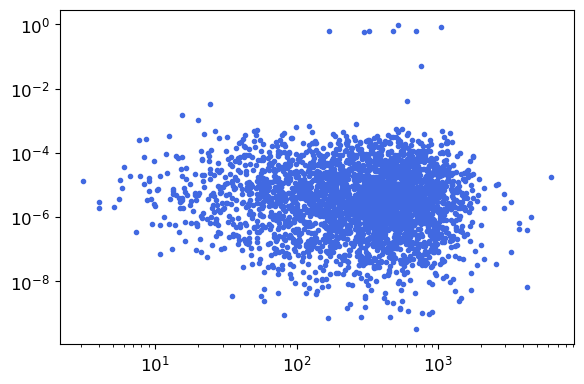

In [84]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mXi_1, np.abs(xd['S']), color='royalblue', marker='o',ms=3,linestyle='',label='$\chi_1^0$')

#plt.xlabel(r'$m_i$(GeV)',size=18)
#plt.ylabel(r'$\xi_i^2\times\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=18)
#plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
plt.show()

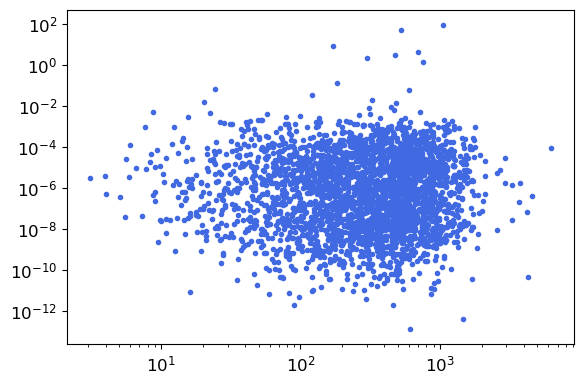

In [85]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mXi_1, np.abs(xd['T']), color='royalblue', marker='o',ms=3,linestyle='',label='$\chi_1^0$')

#plt.xlabel(r'$m_i$(GeV)',size=18)
#plt.ylabel(r'$\xi_i^2\times\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=18)
#plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
plt.show()

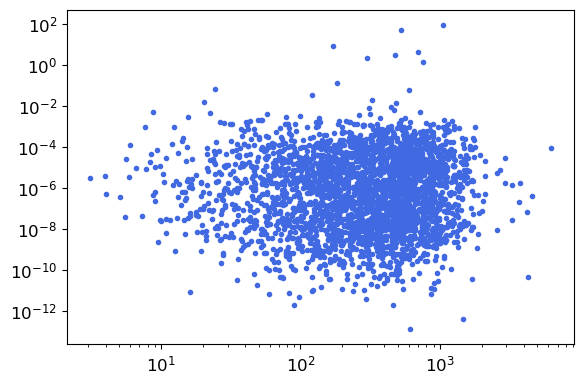

In [86]:
plt.figure(figsize=(6,4))

plt.loglog(xd.mXi_1, np.abs(xd['T']), color='royalblue', marker='o',ms=3,linestyle='',label='$\chi_1^0$')

#plt.xlabel(r'$m_i$(GeV)',size=18)
#plt.ylabel(r'$\xi_i^2\times\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=18)
#plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
plt.show()